In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot  as plt
import seaborn as sns
import networkx as nx
from datetime import datetime
from itertools import product
from geopy.distance import distance, lonlat
import pandas as pd
from sqlalchemy.orm import sessionmaker
from datetime import datetime, timedelta
import networkx as nx
import scipy as sp
from scipy.special import comb
import random
import copy
import seaborn as sns
import matplotlib.dates as mdates
from shapely import wkb
import binascii
from pyproj import Transformer
from collections import defaultdict

In [2]:
# database credentials
db_usr, db_pwd = '', '' # your database user name and password

# database login
host, port, db = 'nc-health-data-prod.cluster-ccsgl7rk4urn.eu-central-1.rds.amazonaws.com', 5432, 'master'
engine = create_engine('postgresql://'+db_usr+':'+db_pwd+'@'+host+':'+str(port)+'/'+db)
Session = sessionmaker(bind=engine)
session = Session()
conn = engine.connect()

In [3]:
def consolidate_list(lst):
    mapping = {}
    
    for item in lst:
        # Use a tuple of the sorted first two elements as a key for the dictionary
        key = tuple(sorted(item[:2]))
        if key in mapping:
            mapping[key].append(item[2])
        else:
            mapping[key] = [item[2]]
    # Convert the dictionary back to the desired list format
    result = [(k[0], k[1], mapping[k]) for k in mapping.keys()]

    return result
def sort_time(weight_list):
    data = weight_list
    # Extract the timestamps and create a DataFrame
    df = pd.DataFrame(data, columns=["Latitude", "Longitude", "Timestamp"])

    # Sort by Timestamp
    df = df.sort_values(by="Timestamp")

    # Group and select the first timestamp of each group
    df['group'] = (df['Timestamp'].diff() > pd.Timedelta(minutes=60)).cumsum()
    df = df.groupby('group').first().reset_index(drop=True)
    tuples = [tuple(row) for row in df.itertuples(index=False)]

    return tuples

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the `matches_contacts` and `calculate_sum` functions are already defined

import pandas as pd

# Creating the DataFrame with the updated match information, German city names, and times
# Creating the DataFrame with the updated match information, German city names, and times
data_group_a = {
    'City': ['München', 'Köln', 'Stuttgart', 'Köln', 'Frankfurt am Main', 'Stuttgart'],
    'Date': ['2024-06-14', '2024-06-15', '2024-06-19', '2024-06-19', '2024-06-23', '2024-06-23'],
    'Time': ['21:00', '15:00', '18:00', '21:00', '21:00', '21:00'],
    'Population': [1471508, 1085664, 634830, 1085664, 753056, 634830],
    'Match': [
        'Germany 5 - 1 Scotland', 
        'Hungary 1 - 3 Switzerland', 
        'Germany 2 - 0 Hungary', 
        'Scotland 1 - 1 Switzerland', 
        'Switzerland 1 - 1 Germany', 
        'Scotland 0 - 1 Hungary'
    ]
}
df_group_a = pd.DataFrame(data_group_a)

data_group_b = {
    'City': ['Berlin', 'Dortmund', 'Hamburg', 'Gelsenkirchen', 'Leipzig', 'Düsseldorf'],
    'Date': ['2024-06-15', '2024-06-15', '2024-06-19', '2024-06-20', '2024-06-24', '2024-06-24'],
    'Time': ['18:00', '21:00', '15:00', '21:00', '21:00', '21:00'],
    'Population': [3769000, 588462, 1841179, 260000, 597493, 619294],
    'Match': [
        'Spain 3 - 0 Croatia', 
        'Italy 2 - 1 Albania', 
        'Croatia 2 - 2 Albania', 
        'Spain 1 - 0 Italy', 
        'Croatia 1 - 1 Italy', 
        'Albania 0 - 1 Spain'
    ]
}
df_group_b = pd.DataFrame(data_group_b)

data_group_c = {
    'City': ['Stuttgart', 'Gelsenkirchen', 'München', 'Frankfurt am Main', 'Köln', 'München'],
    'Date': ['2024-06-16', '2024-06-16', '2024-06-20', '2024-06-20', '2024-06-25', '2024-06-25'],
    'Time': ['18:00', '21:00', '15:00', '18:00', '21:00', '21:00'],
    'Population': [634830, 260000, 1472000, 753056, 1085664, 1472000],
    'Match': [
        'Slovenia 1 - 1 Denmark', 
        'Serbia 0 - 1 England', 
        'Slovenia 1 - 1 Serbia', 
        'Denmark 1 - 1 England', 
        'England 0 - 0 Slovenia', 
        'Denmark 0 - 0 Serbia'
    ]
}

df_group_c= pd.DataFrame(data_group_c)

data_group_d = {
    'City': ['Hamburg', 'Düsseldorf', 'Berlin', 'Leipzig', 'Berlin', 'Dortmund'],
    'Date': ['2024-06-16', '2024-06-17', '2024-06-21', '2024-06-21', '2024-06-25', '2024-06-25'],
    'Time': ['15:00', '21:00', '18:00', '21:00', '18:00', '18:00'],
    'Population': [1841179, 619294, 3769000, 597493, 3769000, 588462],
    'Match': [
        'Poland 1 - 2 Netherlands', 
        'Austria 0 - 1 France', 
        'Poland 1 - 3 Austria', 
        'Netherlands 0 - 0 France', 
        'Netherlands 2 - 3 Austria', 
        'France 1 - 1 Poland'
    ]
}
df_group_d = pd.DataFrame(data_group_d)


data_group_e = {
    'City': ['München', 'Frankfurt am Main', 'Düsseldorf', 'Köln', 'Frankfurt am Main', 'Stuttgart'],
    'Date': ['2024-06-17', '2024-06-17', '2024-06-21', '2024-06-22', '2024-06-26', '2024-06-26'],
    'Time': ['15:00', '18:00', '15:00', '21:00', '18:00', '18:00'],
    'Population': [1488202, 753056, 617280, 1080394, 753056, 635911],
    'Match': [
        'Romania 3 - 0 Ukraine', 
        'Belgium 0 - 1 Slovakia', 
        'Slovakia 1 - 2 Ukraine', 
        'Belgium 2 - 0 Romania', 
        'Slovakia 1 - 1 Romania', 
        'Ukraine 0 - 0 Belgium'
    ]
}

df_group_e = pd.DataFrame(data_group_e)


# Creating the DataFrame with the match information, cities, dates, times, and populations
data_group_f = {
    'City': ['Dortmund', 'Leipzig', 'Hamburg', 'Dortmund', 'Gelsenkirchen', 'Hamburg'],
    'Date': ['2024-06-18', '2024-06-18', '2024-06-22', '2024-06-22', '2024-06-26', '2024-06-26'],
    'Time': ['18:00', '21:00', '15:00', '18:00', '21:00', '21:00'],
    'Population': [588462, 597493, 1841179, 588462, 260000, 1841179],
    'Match': [
        'Turkey 3 - 1 Georgia', 
        'Portugal 2 - 1 Czechia', 
        'Georgia 1 - 1 Czechia', 
        'Turkey 0 - 3 Portugal', 
        'Georgia 2 - 0 Portugal', 
        'Czechia 1 - 2 Turkey'
    ]
}
df_group_f = pd.DataFrame(data_group_f)




data_eurocup_16th = {
    'City': ['Dortmund', 'Berlin', 'Gelsenkirchen', 'Köln', 'Düsseldorf', 'Frankfurt am Main', 'München', 'Leipzig'],
    'Date': ['2024-06-29', '2024-06-29', '2024-06-30', '2024-06-30', '2024-07-01', '2024-07-01', '2024-07-02', '2024-07-02'],
    'Time': ['21:00', '18:00', '18:00', '21:00', '18:00', '21:00', '18:00', '21:00'],
    'Population': [588462, 3644826, 260000, 1085664, 617280, 736414, 1471508, 597493],
    'Match': [
        'Germany 2 - 0 Denmark',
        'Switzerland 2 - 0 Italy',
        'England 2 - 1 Slovakia ',
        'Spain 4 - 1 Georgia',
        'France 1 - 0 Belgium',
        'Portugal 0 - 0 Slovenia',
        'Romania 0 - 3 Netherlands',
        'Austria 1 - 2 Turkey'
    ]
}

df_eurocup_16th = pd.DataFrame(data_eurocup_16th)

# Creating the dataframe for the semifinals
data_semifinals = {
    'City': ['München', 'Dortmund'],
    'Date': ['2024-07-09', '2024-07-10'],
    'Time': ['21:00', '21:00'],
    'Population': [1471508, 588462],
    'Match': [
        'Spain 2 - 1 France',
        'Netherlands 1 - 2 England'
    ]
}

df_semifinals = pd.DataFrame(data_semifinals)

# Creating the dataframe for the quarterfinals
data_quarterfinals = {
    'City': ['Stuttgart', 'Hamburg', 'Berlin', 'Düsseldorf'],
    'Date': ['2024-07-05', '2024-07-05', '2024-07-06', '2024-07-06'],
    'Time': ['18:00', '21:00', '18:00', '21:00'],
    'Population': [634830, 1841179, 3644826, 617280],
    'Match': [
        'Spain 2 - 1 Germany',
        'Portugal 0 - 0 France ',
        'Netherlands 2 - 1 Turkey',
        'England 1 - 1 Switzerland'
    ]
}

df_quarterfinals = pd.DataFrame(data_quarterfinals)

data_final = {
    'City': ['Berlin'],
    'Date': ['2024-07-14'],
    'Time': ['21:00'],
    'Population': [3644826],
    'Match': [
        'Spain 2 - 1 England'
    ]
}

df_final = pd.DataFrame(data_final)



# Creating the DataFrame with the match information, cities, dates, times, and populations


df_group_a['Group'] = 'Group A'
df_group_b['Group'] = 'Group B'
df_group_c['Group'] = 'Group C'
df_group_d['Group'] = 'Group D'
df_group_e['Group'] = 'Group E'
df_group_f['Group'] = 'Group F'

# Combine the DataFrames
combined_df = pd.concat([df_group_a, df_group_b, df_group_c, df_group_d, df_group_e, df_group_f, df_eurocup_16th, df_quarterfinals, df_semifinals, df_final ], ignore_index=True)
print(combined_df)

                 City        Date   Time  Population  \
0             München  2024-06-14  21:00     1471508   
1                Köln  2024-06-15  15:00     1085664   
2           Stuttgart  2024-06-19  18:00      634830   
3                Köln  2024-06-19  21:00     1085664   
4   Frankfurt am Main  2024-06-23  21:00      753056   
5           Stuttgart  2024-06-23  21:00      634830   
6              Berlin  2024-06-15  18:00     3769000   
7            Dortmund  2024-06-15  21:00      588462   
8             Hamburg  2024-06-19  15:00     1841179   
9       Gelsenkirchen  2024-06-20  21:00      260000   
10            Leipzig  2024-06-24  21:00      597493   
11         Düsseldorf  2024-06-24  21:00      619294   
12          Stuttgart  2024-06-16  18:00      634830   
13      Gelsenkirchen  2024-06-16  21:00      260000   
14            München  2024-06-20  15:00     1472000   
15  Frankfurt am Main  2024-06-20  18:00      753056   
16               Köln  2024-06-25  21:00     108

## Heatmaps per city

In [59]:
slots = 24
start_date = datetime.strptime('2024-05-01', '%Y-%m-%d')
end_date = datetime.strptime('2024-07-30', '%Y-%m-%d')
city='Berlin'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from collections import defaultdict




# Event details from combined_df
event_details = combined_df[['City', 'Date', 'Time', 'Match']]

# Convert Date column to datetime
event_details['Date'] = pd.to_datetime(event_details['Date'])

# Extract event times and dates
event_times = {
    (row['City'], datetime.strptime(row['Date'].strftime('%Y-%m-%d') + ' ' + row['Time'], '%Y-%m-%d %H:%M')): row['Match']
    for index, row in event_details.iterrows()
    if start_date <= row['Date'] <= end_date
}


# Generate the list of days
delta = end_date - start_date
days_list = [(start_date + timedelta(days=i)).strftime('%Y-%m-%d') for i in range(delta.days + 1)]
print(days_list)

df_total = pd.DataFrame()
data_dict = {}
for day in days_list:
    query =f"""
    SELECT *
    FROM (
        SELECT cnv.*, t2p.*
        FROM covid_network_sdkv6_tl5_10m cnv 
        JOIN tile2plz t2p ON cnv.tile_id = t2p.tile_id
        WHERE "day" = '{day}'
    ) t1
    JOIN covid_plz_populate cpp ON t1.plz = cpp.id_plz5 
    WHERE city = '{city}'
    """


    didlist=[]
    pairlist=[]

    df_day= pd.DataFrame(pd.read_sql_query(query, conn))
    transformer = Transformer.from_crs("epsg:3857", "epsg:4326")

    # iterate over contact events
    for dids, sources, in_stad, point, time in zip(df_day.dids, df_day.sources, df_day.dist_stads, df_day.geopoint, df_day.stime):
        ngps = 1 if (in_stad==True) else 0
        for i, si in zip(dids, sources[1:-1].split(',')):
            for j, sj in zip(dids, sources[1:-1].split(',')):
                if i < j and [si, sj].count('GPS') >= ngps:
                    # collect dids in did list
                    didlist.append(i)
                    didlist.append(j)
                    bytes_object = binascii.unhexlify(point)
                    geometry = wkb.loads(bytes_object)
                    # Transformer from EPSG:3857 to EPSG:4326

                    # Assuming that `geometry` is a Point
                    lon, lat = transformer.transform(geometry.x, geometry.y)
                    # collect pairs of dids in pair list
                    pairlist.append((i, j, (lon, lat, time)))

    # get unique dids and did pairs
    print(f"Checkpoint 1 at: {datetime.now()}")
    didlist, pairlist = list(set(didlist)), list(set(pairlist))
    print(len(didlist))

    G = nx.Graph()
    G.add_nodes_from(didlist)
    print(f"Checkpoint 2 at: {datetime.now()}")

    pairlist_multiple = consolidate_list(pairlist)
    pairlist_multiple = [(node1, node2, sort_time(another_list)) for node1, node2, another_list in pairlist_multiple]
    G.add_weighted_edges_from(pairlist_multiple)
    print(len(G.edges()))
    print(len(G.nodes()))
    edges = list(G.edges(data=True))

    for edge in edges:
        node1, node2, attr = edge
        for weight in attr['weight']:
            matrix = np.zeros((1, slots), dtype=int)
            gps_point = weight[:2]
            timestamp = weight[2]
            if timestamp.tzinfo is not None:
                timestamp = timestamp.tz_localize(None)
            hour = timestamp.hour
            minute = timestamp.minute
            interval_index = (hour * 60 + minute) // 60
            matrix[0][interval_index] = 1
            key = (node1, node2, day)
            if key in data_dict:
                data_dict[key]['vector'] += matrix.flatten()
                data_dict[key]['gps_points'].append(gps_point)
            else:
                data_dict[key] = {
                    'did1': node1,
                    'did2': node2,
                    'vector': matrix.flatten(),
                    'gps_points': [gps_point],
                    'day': day
                }


C:\Users\alejandra.rincon\AppData\Local\Temp\ipykernel_35284\4194593803.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_details['Date'] = pd.to_datetime(event_details['Date'])


['2024-05-01', '2024-05-02', '2024-05-03', '2024-05-04', '2024-05-05', '2024-05-06', '2024-05-07', '2024-05-08', '2024-05-09', '2024-05-10', '2024-05-11', '2024-05-12', '2024-05-13', '2024-05-14', '2024-05-15', '2024-05-16', '2024-05-17', '2024-05-18', '2024-05-19', '2024-05-20', '2024-05-21', '2024-05-22', '2024-05-23', '2024-05-24', '2024-05-25', '2024-05-26', '2024-05-27', '2024-05-28', '2024-05-29', '2024-05-30', '2024-05-31', '2024-06-01', '2024-06-02', '2024-06-03', '2024-06-04', '2024-06-05', '2024-06-06', '2024-06-07', '2024-06-08', '2024-06-09', '2024-06-10', '2024-06-11', '2024-06-12', '2024-06-13', '2024-06-14', '2024-06-15', '2024-06-16', '2024-06-17', '2024-06-18', '2024-06-19', '2024-06-20', '2024-06-21', '2024-06-22', '2024-06-23', '2024-06-24', '2024-06-25', '2024-06-26', '2024-06-27', '2024-06-28', '2024-06-29', '2024-06-30', '2024-07-01', '2024-07-02', '2024-07-03', '2024-07-04', '2024-07-05', '2024-07-06', '2024-07-07', '2024-07-08', '2024-07-09', '2024-07-10', '2024

In [ ]:
data_dict

In [ ]:
date_range = [start_date + timedelta(days=x) for x in range((end_date - start_date).days + 1)]
number_of_days = len(date_range)
organized_data = defaultdict(lambda: np.zeros((number_of_days, slots)))


for (did1, did2, date_str), info in data_dict.items():
    date = datetime.strptime(date_str, '%Y-%m-%d')
    index = (date - start_date).days
    if 0 <= index < number_of_days:
        organized_data[(did1, did2)][index, :] = info['vector']
    else:
        print(f"Index {index} is out of bounds for ({did1}, {did2}) with date {date_str}")

df_rows = []

for (did1, did2), vectors in organized_data.items():
    # Create a full vector matrix initialized with zeros
    full_vector_matrix = np.zeros((number_of_days, slots))

    # Directly assign the vectors to the corresponding dates
    full_vector_matrix[:vectors.shape[0], :vectors.shape[1]] = vectors
    # Sum the slots per day
    daily_sums = full_vector_matrix.sum(axis=1)


    # Append to the DataFrame rows
    df_rows.append({'pair': f'{did1}-{did2}', 'vector': full_vector_matrix, 'daily_sums': daily_sums})






In [ ]:
df = pd.DataFrame(df_rows)
df['flattened_vector'] = df['vector'].apply(lambda x: x.reshape(-1))

number_of_days = len(df['flattened_vector'].iloc[0]) // slots
heatmap_data = np.zeros((number_of_days, slots))
for _, row in df.iterrows():
    matrix = np.array(row['vector']).reshape(number_of_days, slots)
    heatmap_data += matrix
    
heatmap_data_df = pd.DataFrame(heatmap_data)


In [ ]:
heatmap_data_df.to_csv(f'heatmap_data_{city}.csv', index=False)

In [ ]:
heatmap_data_df

In [ ]:
# Flip the data for correct orientation
heatmap_data = np.flipud(heatmap_data.T)


In [ ]:
import matplotlib.colors as mcolors

sns.set_context("notebook")
sns.set_style("white")

# Assuming heatmap_data, start_date, number_of_days, slots, city, and event_times are already defined

vmax_auto = np.max(heatmap_data)
print(vmax_auto)
fig, ax = plt.subplots(figsize=(40, 15))

# Create the heatmap without the color bar
cax = sns.heatmap(heatmap_data, cmap='YlGnBu', vmin=0, vmax=250, ax=ax, linewidths=.5, cbar=False)

# Generate all dates within the range
dates = [start_date + timedelta(days=i) for i in range(number_of_days)]

# Identify all Sundays
sundays = [date for date in dates if date.weekday() == 6]

# Select every other Sunday
sundays_every_two_weeks = sundays[::2]

# Positions of the selected Sundays in the dates list
sunday_positions = [dates.index(sunday) for sunday in sundays_every_two_weeks]

# Set x-ticks at the positions of the selected Sundays
ax.set_xticks(sunday_positions)

# Set x-tick labels as the formatted dates
xtick_labels = [sunday.strftime('%m-%d') for sunday in sundays_every_two_weeks]
ax.set_xticklabels(xtick_labels, ha='right', fontsize=60)

# Set y-ticks every 4 hours
ax.set_yticks([i + 3.5 for i in range(0, slots, 4)])  # Ticks at 0, 4, 8, 12, 16, 20

# Set y-tick labels corresponding to every 4 hours
ax.set_yticklabels(reversed(range(0, slots, 4)), fontsize=60, rotation=0)

# Move the y-axis label slightly to the right
ax.set_ylabel("hour of the day", fontsize=70, labelpad=30)  # Adjust 'labelpad' as needed

ax.set_title(f"{city}", fontsize=80)

# Define a threshold for deciding if the text color should be orange
threshold = 40  # Adjust this value based on your data

# Plot events
for (event_city, event_time), event_name in event_times.items():
    if event_city == city:
        event_day_index = (event_time.date() - start_date.date()).days
        event_hour_index = slots - 1 - event_time.hour  # Adjusted for 24 slots

        match_parts = event_name.split(" ")
        team1 = match_parts[0][:3].upper()
        score1 = match_parts[1]
        score2 = match_parts[3]
        team2 = match_parts[4][:3].upper()

        team_abbreviation = f"{team1}-{team2}"
        
        # Determine if the value in heatmap_data is below the threshold
        cell_value = heatmap_data[event_hour_index, event_day_index]
        if cell_value < threshold:
            text_color = 'black'
            font_weight = 'normal'
        else:
            text_color = '#FF4500'
            font_weight = 'bold'
        
        ax.text(event_day_index + 0.5, event_hour_index + 0.5, team_abbreviation,
                ha='center', va='center', color=text_color, fontsize=30, rotation=90)

plt.tight_layout()
plt.show()


## Contacts before and after of the match

We study 8 hours before of the match, 2 hours during the match and 2 hours aftewards. We normalized the number of contacts per hour and give to each curve a color depending on the city

In [7]:
def relevant_entries(heatmap_data, target_time):
    """
    give us entries for four hours before and two hours after the target time.
    
    Parameters:
    heatmap_data (numpy array): An array of size (24, 1) representing heatmap data for 24 hours.
    target_time (int): The target hour in the range of 0 to 23.
    
    Returns:
    int: The sum of the entries for two hours before and three hours after the target time.
    """
    heatmap_data = heatmap_data.flatten()
    print(heatmap_data)
    # Calculate the indices for two hours before and three hours after the target time
    start_index = (target_time - 8) % 24
    end_index = (target_time + 4) % 24
    
    # Handle the case where the interval wraps around midnight
    if start_index < end_index:
        relevant_entries = heatmap_data[start_index:end_index+1]
    else:
        relevant_entries = np.concatenate((heatmap_data[start_index:], heatmap_data[:end_index+1]))
    print('relevant_entries',relevant_entries)
    return relevant_entries

In [8]:
import pandas as pd
import binascii
from shapely import wkb
from pyproj import Transformer
import networkx as nx
from datetime import datetime
import numpy as np
from collections import defaultdict
slots=24


def matches_contacts(city, date):
    days_list = [date]  # Assuming we're dealing with one date at a time for simplicity
    
    for day in days_list:
        print(day)
        query = f"""
            SELECT *
            FROM (
                SELECT cnv.*, t2p.*
                FROM covid_network_sdkv6_tl5_10m cnv 
                JOIN tile2plz t2p ON cnv.tile_id = t2p.tile_id
                WHERE "day" ='{day}' 
            ) t1
            JOIN covid_plz_populate cpp ON t1.plz = cpp.id_plz5 
            WHERE city= '{city}' 
        """

        didlist = []
        pairlist = []

        df_day = pd.DataFrame(pd.read_sql_query(query, conn))
        print(df_day)
        transformer = Transformer.from_crs("epsg:3857", "epsg:4326")

        for dids, sources, in_stad, point, stime in zip(df_day.dids, df_day.sources, df_day.dist_stads, df_day.geopoint, df_day.stime):
            ngps = 1 if (in_stad == True) else 0
            bytes_object = binascii.unhexlify(point)
            geometry = wkb.loads(bytes_object)
            lon, lat = transformer.transform(geometry.x, geometry.y)
            for i, si in zip(dids, sources[1:-1].split(',')):
                for j, sj in zip(dids, sources[1:-1].split(',')):
                    if i < j and [si, sj].count('GPS') >= ngps:
                        didlist.append(i)
                        didlist.append(j)
                        pairlist.append((i, j, (lon, lat, stime)))

        print(f"Checkpoint 1 at: {datetime.now()}")
        didlist, pairlist = list(set(didlist)), list(set(pairlist))
        print(len(didlist))
        G = nx.Graph()
        G.add_nodes_from(didlist)
        print(f"Checkpoint 2 at: {datetime.now()}")
        pairlist_multiple = consolidate_list(pairlist)
        pairlist_multiple = [(node1, node2, sort_time(another_list)) for node1, node2, another_list in pairlist_multiple]
        G.add_weighted_edges_from(pairlist_multiple)
        print(len(G.edges()))
        edges = list(G.edges(data=True))

        data_dict = {}
        for edge in edges:
            node1, node2, attr = edge
            for weight in attr['weight']:
                matrix = np.zeros((1, slots), dtype=int)  # 24 hours * 6 intervals per hour
                gps_point = weight[:2]
                timestamp = weight[2]
                if timestamp.tzinfo is not None:
                    timestamp = timestamp.tz_localize(None)
                hour = timestamp.hour
                minute = timestamp.minute
                interval_index = (hour * 60 + minute) // (1* 60)

                matrix[0][interval_index] = 1
                key = (node1, node2, day)
                if key in data_dict:
                    data_dict[key]['vector'] += matrix.flatten()
                    data_dict[key]['gps_points'].append(gps_point)
                else:
                    data_dict[key] = {
                        'did1': node1,
                        'did2': node2,
                        'vector': matrix.flatten(),
                        'gps_points': [gps_point],
                        'day': day
                    }
                    
        number_of_days = 1
        # Initialize the organized data structure
        organized_data = defaultdict(lambda: np.zeros((number_of_days, slots)))  # Default to zero matrix

        # Populate the data structure
        for (did1, did2, date_str), info in data_dict.items():
            date = datetime.strptime(date_str, '%Y-%m-%d')
            index = 0

            # Ensure the index is within the valid range
            if 0 <= index < number_of_days:
                organized_data[(did1, did2)][index, :] = info['vector']
            else:
                print(f"Index {index} is out of bounds for ({did1}, {did2}) with date {date_str}")

        # List to hold the DataFrame rows
        df_rows = []

        # Iterate through the organized data
        for (did1, did2), vectors in organized_data.items():
            # Create a full vector matrix initialized with zeros
            full_vector_matrix = np.zeros((number_of_days, slots))

            # Directly assign the vectors to the corresponding dates
            full_vector_matrix[:vectors.shape[0], :vectors.shape[1]] = vectors

            # Append to the DataFrame rows
            df_rows.append({'did1': did1, 'did2': did2, 'vector': full_vector_matrix})

        # Create the DataFrame
        df = pd.DataFrame(df_rows)

        # Flatten the vector column efficiently using np.reshape
        df['flattened_vector'] = df['vector'].apply(lambda x: x.reshape(-1))

        print('vector', len(df['flattened_vector'][0]))
        
        number_of_days = len(df['flattened_vector'].iloc[0]) // slots# Assuming all vectors are the same length and correctly formatted
        print(number_of_days)
        heatmap_data = np.zeros((1, slots))
        for _, row in df.iterrows():
            matrix = np.array(row['vector']).reshape(number_of_days, slots)
            heatmap_data += matrix

        # Flip the heatmap data vertically to display 0 to 23 from bottom to top
        heatmap_data = np.flipud(heatmap_data)
        print(heatmap_data)
        

                    

        return heatmap_data
    

In [9]:
results = []
matches = []

# Iterate through the DataFrame rows
for index, row in combined_df.iterrows():
    city = row['City']
    date = row['Date']
    
    # Get the heatmap data for the current city and date
    heatmap_data = matches_contacts(city, date)
    
    # Extract the necessary information from the row
    time = row['Time']
    match = row['Match']
    
    # Extract the target hour from the time string
    target_hour = int(time.split(':')[0])
    print(f"Processing {city} on {date} at {time} for match {match}")
    print('Current heatmap:', heatmap_data)
    print('Target hour:', target_hour)
    
    # Get relevant entries from the heatmap data
    result = relevant_entries(heatmap_data, target_hour)
    print('Result:', result)
    
    # Append the results and matches to their respective lists
    results.append(result)
    matches.append(match)

# Add the results and matches to the DataFrame
combined_df['Result'] = results
combined_df['MatchLabel'] = matches


2024-06-14
      tile_id           tl5  \
0       28715  287151111000   
1       28313  283133203000   
2       28313  283133301000   
3       28313  283133332000   
4       28720  287201030000   
...       ...           ...   
1090    34347  343473020000   
1091    34347  343473022000   
1092    34347  343473121000   
1093    35160  351602112000   
1094    35160  351602313000   

                                               geopoint inside_building  \
0     0101000020110F0000873877944F81334169A4E8287A58...            None   
1     0101000020110F0000571A72FA3F9C3341FBF39C64FB57...            None   
2     0101000020110F0000D89CED23B29D3341D6A7C4E5E057...            None   
3     0101000020110F000045DCA3B9189E334136026E512658...            None   
4     0101000020110F00000C682BBAAC9C33416FE6529D6F58...            None   
...                                                 ...             ...   
1090  0101000020110F000060029C7CFCBB33417AAAC7926D6D...            None   
1091  0101000020

1173
vector 24
1
[[ 12.   6.   2.   8.   8.   9.  46.  67.  66. 119. 108. 127. 136.  97.
   87.  81.  75.  64.  52.  24.  15.   9.   9.   6.]]
Processing Köln on 2024-06-15 at 15:00 for match Hungary 1 - 3 Switzerland
Current heatmap: [[ 12.   6.   2.   8.   8.   9.  46.  67.  66. 119. 108. 127. 136.  97.
   87.  81.  75.  64.  52.  24.  15.   9.   9.   6.]]
Target hour: 15
[ 12.   6.   2.   8.   8.   9.  46.  67.  66. 119. 108. 127. 136.  97.
  87.  81.  75.  64.  52.  24.  15.   9.   9.   6.]
relevant_entries [ 67.  66. 119. 108. 127. 136.  97.  87.  81.  75.  64.  52.  24.]
Result: [ 67.  66. 119. 108. 127. 136.  97.  87.  81.  75.  64.  52.  24.]
2024-06-19
      tile_id           tl5  \
0       60184  601840122000   
1       60184  601840232000   
2       60184  601841230000   
3       60184  601841231000   
4       60184  601841302000   
...       ...           ...   
1682    56170  561703311000   
1683    56170  561703311000   
1684    56170  561703311000   
1685    56170  56170

1458
vector 24
1
[[  2.   0.   3.   4.  28.  85.  56.  40.  53.  55.  55.  58.  81. 109.
  283. 300. 107. 104. 127.  31.  21.   7.   3.   2.]]
Processing Stuttgart on 2024-06-19 at 18:00 for match Germany 2 - 0 Hungary
Current heatmap: [[  2.   0.   3.   4.  28.  85.  56.  40.  53.  55.  55.  58.  81. 109.
  283. 300. 107. 104. 127.  31.  21.   7.   3.   2.]]
Target hour: 18
[  2.   0.   3.   4.  28.  85.  56.  40.  53.  55.  55.  58.  81. 109.
 283. 300. 107. 104. 127.  31.  21.   7.   3.   2.]
relevant_entries [ 55.  58.  81. 109. 283. 300. 107. 104. 127.  31.  21.   7.   3.]
Result: [ 55.  58.  81. 109. 283. 300. 107. 104. 127.  31.  21.   7.   3.]
2024-06-19
      tile_id            tl5  \
0      174207  1742071130000   
1      174207  1742071130000   
2      174207  1742071130000   
3      174207  1742071303000   
4      174207  1742072111000   
...       ...            ...   
2808   179764  1797641213000   
2809   179766  1797661032000   
2810   179766  1797662111000   
2811   18

993
vector 24
1
[[  2.   3.   3.   3.   4.   4.  23.  20.  41.  64.  63.  38.  49.  45.
   82.  86.  83. 186. 113.  54.  87.  36.  11.   2.]]
Processing Frankfurt am Main on 2024-06-23 at 21:00 for match Switzerland 1 - 1 Germany
Current heatmap: [[  2.   3.   3.   3.   4.   4.  23.  20.  41.  64.  63.  38.  49.  45.
   82.  86.  83. 186. 113.  54.  87.  36.  11.   2.]]
Target hour: 21
[  2.   3.   3.   3.   4.   4.  23.  20.  41.  64.  63.  38.  49.  45.
  82.  86.  83. 186. 113.  54.  87.  36.  11.   2.]
relevant_entries [ 45.  82.  86.  83. 186. 113.  54.  87.  36.  11.   2.   2.   3.]
Result: [ 45.  82.  86.  83. 186. 113.  54.  87.  36.  11.   2.   2.   3.]
2024-06-23
     tile_id           tl5                                           geopoint  \
0      60184  601841200000  0101000020110F0000215259EF1B272F415D0EDF5549CA...   
1      60184  601841220000  0101000020110F00006F84E6C71C272F41702D1AD278CA...   
2      60184  601841221000  0101000020110F0000A376722BDA272F41766A7EC478CA.

      tile_id            tl5  \
0      280092  2800921230000   
1      278457  2784571010000   
2      278457  2784571023000   
3      278457  2784571030000   
4      278457  2784571202000   
...       ...            ...   
7154   293279  2932793132000   
7155   294372  2943720012000   
7156   294372  2943720012000   
7157   294372  2943720030000   
7158   294372  2943720031000   

                                               geopoint  \
0     0101000020110F0000571BED8092853641FB1EF90BCB39...   
1     0101000020110F00004BDA023E5FCA36414B115DF75833...   
2     0101000020110F00000EEC060B0CCA36418A7CA725A733...   
3     0101000020110F00003AFB36B66BCA3641408D770B8C33...   
4     0101000020110F00001FDCCF9AB2C93641484D3BCADB33...   
...                                                 ...   
7154  0101000020110F00001C4AF6B36FD03641386E1B3CBD5F...   
7155  0101000020110F0000E007324C34EC3641E79D8BF18561...   
7156  0101000020110F0000E007324C34EC3641E79D8BF18561...   
7157  0101000020110F0000B

1272
vector 24
1
[[  7.   0.   2.   5.   3.  16.  28.  52.  66.  68.  90. 108. 105. 134.
  120. 133. 106. 108.  84.  58.  32.  45.  10.  12.]]
Processing Dortmund on 2024-06-15 at 21:00 for match Italy 2 - 1 Albania
Current heatmap: [[  7.   0.   2.   5.   3.  16.  28.  52.  66.  68.  90. 108. 105. 134.
  120. 133. 106. 108.  84.  58.  32.  45.  10.  12.]]
Target hour: 21
[  7.   0.   2.   5.   3.  16.  28.  52.  66.  68.  90. 108. 105. 134.
 120. 133. 106. 108.  84.  58.  32.  45.  10.  12.]
relevant_entries [134. 120. 133. 106. 108.  84.  58.  32.  45.  10.  12.   7.   0.]
Result: [134. 120. 133. 106. 108.  84.  58.  32.  45.  10.  12.   7.   0.]
2024-06-19
      tile_id            tl5  \
0      333065  3330650110000   
1      333065  3330651202000   
2      333065  3330653001000   
3      333065  3330653212000   
4      333065  3330653232000   
...       ...            ...   
5453   343847  3438473331000   
5454   343847  3438473331000   
5455   343847  3438473331000   
5456   34384

980
vector 24
1
[[  5.   3.   1.  15.  20.  66.  59.  44.  45.  41.  51.  43.  68. 108.
   84.  79.  62.  70. 101.  37.  34.  29.   9.   6.]]
Processing Gelsenkirchen on 2024-06-20 at 21:00 for match Spain 1 - 0 Italy
Current heatmap: [[  5.   3.   1.  15.  20.  66.  59.  44.  45.  41.  51.  43.  68. 108.
   84.  79.  62.  70. 101.  37.  34.  29.   9.   6.]]
Target hour: 21
[  5.   3.   1.  15.  20.  66.  59.  44.  45.  41.  51.  43.  68. 108.
  84.  79.  62.  70. 101.  37.  34.  29.   9.   6.]
relevant_entries [108.  84.  79.  62.  70. 101.  37.  34.  29.   9.   6.   5.   3.]
Result: [108.  84.  79.  62.  70. 101.  37.  34.  29.   9.   6.   5.   3.]
2024-06-24
      tile_id            tl5  \
0      201287  2012873331000   
1      201920  2019202322000   
2      201922  2019222330000   
3      201922  2019223120000   
4      201922  2019223202000   
...       ...            ...   
3075   210778  2107782002000   
3076   211407  2114070302000   
3077   211407  2114071110000   
3078   211

1319
vector 24
1
[[  4.   9.   9.  19.  40.  92.  79.  72.  58.  84.  67. 103.  70. 110.
  170.  77.  96.  68.  65.  39.  24.  35.  10.   3.]]
Processing Düsseldorf on 2024-06-24 at 21:00 for match Albania 0 - 1 Spain
Current heatmap: [[  4.   9.   9.  19.  40.  92.  79.  72.  58.  84.  67. 103.  70. 110.
  170.  77.  96.  68.  65.  39.  24.  35.  10.   3.]]
Target hour: 21
[  4.   9.   9.  19.  40.  92.  79.  72.  58.  84.  67. 103.  70. 110.
 170.  77.  96.  68.  65.  39.  24.  35.  10.   3.]
relevant_entries [110. 170.  77.  96.  68.  65.  39.  24.  35.  10.   3.   4.   9.]
Result: [110. 170.  77.  96.  68.  65.  39.  24.  35.  10.   3.   4.   9.]
2024-06-16
     tile_id           tl5                                           geopoint  \
0      55720  557202332000  0101000020110F0000707CF829053D2F416B54C6F078BC...   
1      55720  557202332000  0101000020110F0000707CF829053D2F416B54C6F078BC...   
2      55720  557203223000  0101000020110F0000AB82995F3C3F2F41303EDBC178BC...   
3     

     tile_id            tl5  \
0     216052  2160523211000   
1     216675  2166753322000   
2     215428  2154281031000   
3     215428  2154281130000   
4     215428  2154281130000   
..       ...            ...   
851   223558  2235582133000   
852   224184  2241842033000   
853   224186  2241863103000   
854   224186  2241863112000   
855   224813  2248131313000   

                                              geopoint  \
0    0101000020110F00007485BF81F8252841CB3B66B15B98...   
1    0101000020110F000092634C45D819284152A176072F9A...   
2    0101000020110F000090A0D6157F262841C144A1FBCE95...   
3    0101000020110F0000C94FEBEBD728284103FA44EDD095...   
4    0101000020110F0000C94FEBEBD728284103FA44EDD095...   
..                                                 ...   
851  0101000020110F0000EA262D35DB052841ADAF314205AB...   
852  0101000020110F00002D09A493BADC27419D74C2FB74AC...   
853  0101000020110F0000A9D99595B8FD2741D7DC99F45EAC...   
854  0101000020110F00002CF6C36C81FE2741E853759F

680
vector 24
1
[[ 1.  1.  1.  3. 10. 36. 44. 64. 41. 32. 56. 60. 58. 97. 69. 64. 38. 23.
  13.  7.  1.  4.  2.  1.]]
Processing München on 2024-06-20 at 15:00 for match Slovenia 1 - 1 Serbia
Current heatmap: [[ 1.  1.  1.  3. 10. 36. 44. 64. 41. 32. 56. 60. 58. 97. 69. 64. 38. 23.
  13.  7.  1.  4.  2.  1.]]
Target hour: 15
[ 1.  1.  1.  3. 10. 36. 44. 64. 41. 32. 56. 60. 58. 97. 69. 64. 38. 23.
 13.  7.  1.  4.  2.  1.]
relevant_entries [64. 41. 32. 56. 60. 58. 97. 69. 64. 38. 23. 13.  7.]
Result: [64. 41. 32. 56. 60. 58. 97. 69. 64. 38. 23. 13.  7.]
2024-06-20
      tile_id            tl5  \
0      129656  1296560001000   
1      129656  1296560003000   
2      129656  1296560003000   
3      129656  1296560003000   
4      129656  1296560011000   
...       ...            ...   
1936   130109  1301093122000   
1937   130109  1301093123000   
1938   130109  1301093233000   
1939   130109  1301093233000   
1940   130109  1301093302000   

                                             

      tile_id            tl5  \
0      174207  1742071130000   
1      174207  1742071130000   
2      174207  1742071130000   
3      174207  1742071130000   
4      174207  1742071130000   
...       ...            ...   
2583   180402  1804022021000   
2584   180402  1804022023000   
2585   180402  1804023102000   
2586   180402  1804023102000   
2587   180402  1804023222000   

                                               geopoint  \
0     0101000020110F00007ABFFA5C9BDA2741F8FD0CDD2930...   
1     0101000020110F00007ABFFA5C9BDA2741F8FD0CDD2930...   
2     0101000020110F00007ABFFA5C9BDA2741F8FD0CDD2930...   
3     0101000020110F00007ABFFA5C9BDA2741F8FD0CDD2930...   
4     0101000020110F00007ABFFA5C9BDA2741F8FD0CDD2930...   
...                                                 ...   
2583  0101000020110F0000B33A23D2FD692741798064A91040...   
2584  0101000020110F0000C23EA327F869274155DE307E2940...   
2585  0101000020110F00002809B1C9867227410D02B49FFF3F...   
2586  0101000020110F00002

598
vector 24
1
[[ 1.  0.  1.  6. 21. 30. 44. 33. 39. 26. 39. 26. 43. 37. 66. 46. 38. 50.
  48.  6. 12. 13.  4.  1.]]
Processing München on 2024-06-25 at 21:00 for match Denmark 0 - 0 Serbia
Current heatmap: [[ 1.  0.  1.  6. 21. 30. 44. 33. 39. 26. 39. 26. 43. 37. 66. 46. 38. 50.
  48.  6. 12. 13.  4.  1.]]
Target hour: 21
[ 1.  0.  1.  6. 21. 30. 44. 33. 39. 26. 39. 26. 43. 37. 66. 46. 38. 50.
 48.  6. 12. 13.  4.  1.]
relevant_entries [37. 66. 46. 38. 50. 48.  6. 12. 13.  4.  1.  1.  0.]
Result: [37. 66. 46. 38. 50. 48.  6. 12. 13.  4.  1.  1.  0.]
2024-06-16
      tile_id            tl5  \
0      332065  3320650313000   
1      333065  3330650110000   
2      333065  3330650131000   
3      333065  3330651220000   
4      333573  3335733130000   
...       ...            ...   
3307   349447  3494473131000   
3308   349448  3494481222000   
3309   333573  3335733131000   
3310   333573  3335733313000   
3311   333574  3335741332000   

                                              

1174
vector 24
1
[[  1.   4.   8.  11.  55.  76.  72.  40.  36.  63.  92.  61.  89. 120.
  130. 123.  95.  54.  45.  30.  10.  17.   4.   1.]]
Processing Düsseldorf on 2024-06-17 at 21:00 for match Austria 0 - 1 France
Current heatmap: [[  1.   4.   8.  11.  55.  76.  72.  40.  36.  63.  92.  61.  89. 120.
  130. 123.  95.  54.  45.  30.  10.  17.   4.   1.]]
Target hour: 21
[  1.   4.   8.  11.  55.  76.  72.  40.  36.  63.  92.  61.  89. 120.
 130. 123.  95.  54.  45.  30.  10.  17.   4.   1.]
relevant_entries [120. 130. 123.  95.  54.  45.  30.  10.  17.   4.   1.   1.   4.]
Result: [120. 130. 123.  95.  54.  45.  30.  10.  17.   4.   1.   1.   4.]
2024-06-21
      tile_id            tl5  \
0      282305  2823052133000   
1      282305  2823052331000   
2      282305  2823053022000   
3      282305  2823053022000   
4      283394  2833940111000   
...       ...            ...   
9790   289988  2899882313000   
9791   289988  2899883003000   
9792   289988  2899883013000   
9793   28

2416
vector 24
1
[[  8.   0.   8.  33.  76. 116. 149. 160. 148. 152. 214. 154. 198. 169.
  214. 220. 184. 129. 123.  60.  45.  39.  13.  22.]]
Processing Leipzig on 2024-06-21 at 21:00 for match Netherlands 0 - 0 France
Current heatmap: [[  8.   0.   8.  33.  76. 116. 149. 160. 148. 152. 214. 154. 198. 169.
  214. 220. 184. 129. 123.  60.  45.  39.  13.  22.]]
Target hour: 21
[  8.   0.   8.  33.  76. 116. 149. 160. 148. 152. 214. 154. 198. 169.
 214. 220. 184. 129. 123.  60.  45.  39.  13.  22.]
relevant_entries [169. 214. 220. 184. 129. 123.  60.  45.  39.  13.  22.   8.   0.]
Result: [169. 214. 220. 184. 129. 123.  60.  45.  39.  13.  22.   8.   0.]
2024-06-25
      tile_id            tl5  \
0      279022  2790220033000   
1      283393  2833930010000   
2      283393  2833930012000   
3      283393  2833930033000   
4      283393  2833930102000   
...       ...            ...   
9711   289445  2894450230000   
9712   289445  2894451311000   
9713   289445  2894452012000   
9714   2

      tile_id            tl5  \
0      217324  2173240001000   
1      217324  2173240010000   
2      217324  2173240011000   
3      217324  2173240021000   
4      217324  2173240021000   
...       ...            ...   
2096   216693  2166931120000   
2097   217314  2173143300000   
2098   217315  2173152323000   
2099   217315  2173152332000   
2100   217315  2173153300000   

                                               geopoint  \
0     0101000020110F000013BAA79EE5562941DC0E40B7379B...   
1     0101000020110F0000F78F2212AE5729410D8FA43E389B...   
2     0101000020110F0000CB5AA68576582941CDD2F4C5389B...   
3     0101000020110F00001D1B502DDD562941B366C2F5699B...   
4     0101000020110F00001D1B502DDD562941B366C2F5699B...   
...                                                 ...   
2096  0101000020110F00003AFAD8EC88FB2841CF895D0F9899...   
2097  0101000020110F00004D95B7E804E22841FE8C1DEA129C...   
2098  0101000020110F000030C03C5803E928419DF51873639C...   
2099  0101000020110F00003

543
vector 24
1
[[ 0.  1.  2.  2. 18. 34. 50. 36. 27. 37. 44. 30. 46. 46. 63. 57. 31. 23.
  11.  7.  8.  5.  2.  1.]]
Processing München on 2024-06-17 at 15:00 for match Romania 3 - 0 Ukraine
Current heatmap: [[ 0.  1.  2.  2. 18. 34. 50. 36. 27. 37. 44. 30. 46. 46. 63. 57. 31. 23.
  11.  7.  8.  5.  2.  1.]]
Target hour: 15
[ 0.  1.  2.  2. 18. 34. 50. 36. 27. 37. 44. 30. 46. 46. 63. 57. 31. 23.
 11.  7.  8.  5.  2.  1.]
relevant_entries [36. 27. 37. 44. 30. 46. 46. 63. 57. 31. 23. 11.  7.]
Result: [36. 27. 37. 44. 30. 46. 46. 63. 57. 31. 23. 11.  7.]
2024-06-17
      tile_id            tl5  \
0      129656  1296560003000   
1      129656  1296560313000   
2      129656  1296561032000   
3      129656  1296561032000   
4      129656  1296561221000   
...       ...            ...   
1214   130109  1301093101000   
1215   130109  1301093103000   
1216   130109  1301093103000   
1217   130109  1301093121000   
1218   130109  1301093300000   

                                             

      tile_id            tl5  \
0      197081  1970810002000   
1      197081  1970810010000   
2      197081  1970810010000   
3      197081  1970810010000   
4      197081  1970810012000   
...       ...            ...   
2038   194546  1945463231000   
2039   194546  1945463231000   
2040   194546  1945463232000   
2041   194546  1945463302000   
2042   194546  1945463320000   

                                               geopoint  \
0     0101000020110F00003FC27ECB0B092741771F71715067...   
1     0101000020110F000050FC01F59F0A27416690ECFF3867...   
2     0101000020110F000050FC01F59F0A27416690ECFF3867...   
3     0101000020110F000050FC01F59F0A27416690ECFF3867...   
4     0101000020110F00000889BAF2990A274185A430F35167...   
...                                                 ...   
2038  0101000020110F00000E941945B6822741CA4EC15DC962...   
2039  0101000020110F00000E941945B6822741CA4EC15DC962...   
2040  0101000020110F00001324D5A7E98127412F536999E162...   
2041  0101000020110F00007

1474
vector 24
1
[[  6.   3.   2.  10.   9.  16.  43.  54.  60.  83. 108. 151. 180. 111.
  152. 129. 104.  57.  74.  37.  56.  46.  32.  19.]]
Processing Köln on 2024-06-22 at 21:00 for match Belgium 2 - 0 Romania
Current heatmap: [[  6.   3.   2.  10.   9.  16.  43.  54.  60.  83. 108. 151. 180. 111.
  152. 129. 104.  57.  74.  37.  56.  46.  32.  19.]]
Target hour: 21
[  6.   3.   2.  10.   9.  16.  43.  54.  60.  83. 108. 151. 180. 111.
 152. 129. 104.  57.  74.  37.  56.  46.  32.  19.]
relevant_entries [111. 152. 129. 104.  57.  74.  37.  56.  46.  32.  19.   6.   3.]
Result: [111. 152. 129. 104.  57.  74.  37.  56.  46.  32.  19.   6.   3.]
2024-06-26
      tile_id            tl5  \
0      129656  1296560003000   
1      129656  1296560013000   
2      129656  1296560200000   
3      129656  1296560200000   
4      129656  1296560202000   
...       ...            ...   
1954   130109  1301093110000   
1955   130109  1301093121000   
1956   130109  1301093233000   
1957   130109 

      tile_id           tl5  \
0       60184  601841021000   
1       60184  601841033000   
2       60184  601841111000   
3       60184  601841200000   
4       60184  601841202000   
...       ...           ...   
1534    56170  561703303000   
1535    56170  561703310000   
1536    56170  561703310000   
1537    56170  561703320000   
1538    56170  561703320000   

                                               geopoint  \
0     0101000020110F000072273178D8272F413EB14DCC19CA...   
1     0101000020110F0000F6F5D5A853292F4170F7D46E31CA...   
2     0101000020110F0000C4254EE0472C2F41AF738DFDE9C9...   
3     0101000020110F0000215259EF1B272F415D0EDF5549CA...   
4     0101000020110F0000897D9F5B1C272F41FCFAF31361CA...   
...                                                 ...   
1534  0101000020110F0000DF94830C66362F41A8E49658C5BD...   
1535  0101000020110F0000DF3E4BAE22372F41172AB494ADBD...   
1536  0101000020110F0000DF3E4BAE22372F41172AB494ADBD...   
1537  0101000020110F00007CE6A769A9352

1439
vector 24
1
[[  3.   1.   3.  15.  32.  77.  68.  50.  50.  79.  76.  69. 101. 110.
  231. 243. 140. 101.  84.  33.  24.   6.   3.   4.]]
Processing Dortmund on 2024-06-18 at 18:00 for match Turkey 3 - 1 Georgia
Current heatmap: [[  3.   1.   3.  15.  32.  77.  68.  50.  50.  79.  76.  69. 101. 110.
  231. 243. 140. 101.  84.  33.  24.   6.   3.   4.]]
Target hour: 18
[  3.   1.   3.  15.  32.  77.  68.  50.  50.  79.  76.  69. 101. 110.
 231. 243. 140. 101.  84.  33.  24.   6.   3.   4.]
relevant_entries [ 76.  69. 101. 110. 231. 243. 140. 101.  84.  33.  24.   6.   3.]
Result: [ 76.  69. 101. 110. 231. 243. 140. 101.  84.  33.  24.   6.   3.]
2024-06-18
      tile_id            tl5  \
0      201285  2012850110000   
1      201287  2012873323000   
2      201921  2019211020000   
3      201922  2019223033000   
4      201923  2019230221000   
...       ...            ...   
3745   211407  2114071112000   
3746   211407  2114071112000   
3747   211407  2114071112000   
3748   2114

Checkpoint 1 at: 2024-08-27 13:59:09.681393
1357
Checkpoint 2 at: 2024-08-27 13:59:09.691218
2621
vector 24
1
[[ 12.   5.   5.  15.  16.  31.  89. 133. 150. 325. 270. 258. 265. 251.
  233. 207. 158.  93.  63.  67.  50.  31.  20.   6.]]
Processing Hamburg on 2024-06-22 at 15:00 for match Georgia 1 - 1 Czechia
Current heatmap: [[ 12.   5.   5.  15.  16.  31.  89. 133. 150. 325. 270. 258. 265. 251.
  233. 207. 158.  93.  63.  67.  50.  31.  20.   6.]]
Target hour: 15
[ 12.   5.   5.  15.  16.  31.  89. 133. 150. 325. 270. 258. 265. 251.
 233. 207. 158.  93.  63.  67.  50.  31.  20.   6.]
relevant_entries [133. 150. 325. 270. 258. 265. 251. 233. 207. 158.  93.  63.  67.]
Result: [133. 150. 325. 270. 258. 265. 251. 233. 207. 158.  93.  63.  67.]
2024-06-22
      tile_id            tl5  \
0      217324  2173240003000   
1      217324  2173240023000   
2      217324  2173240030000   
3      217324  2173240102000   
4      217324  2173240103000   
...       ...            ...   
2033   216690 

      tile_id            tl5  \
0      216675  2166751031000   
1      216675  2166751031000   
2      216675  2166751031000   
3      216675  2166751031000   
4      216675  2166751031000   
...       ...            ...   
1491   219168  2191682021000   
1492   219168  2191682023000   
1493   219168  2191682030000   
1494   219168  2191682201000   
1495   219168  2191682201000   

                                               geopoint inside_building  \
0     0101000020110F00008C37A2BD5319284188DF36ECE798...            None   
1     0101000020110F00008C37A2BD5319284188DF36ECE798...            None   
2     0101000020110F00008C37A2BD5319284188DF36ECE798...            None   
3     0101000020110F00008C37A2BD5319284188DF36ECE798...            None   
4     0101000020110F00008C37A2BD5319284188DF36ECE798...            None   
...                                                 ...             ...   
1491  0101000020110F0000ABD4D9ACE4DD2741E028C542C79F...            None   
1492  010100002

3012
vector 24
1
[[  8.   7.  10.  54. 142. 131. 160. 126. 160. 210. 229. 159. 231. 351.
  330. 329. 190. 108. 108.  52.  42.  33.   9.   7.]]
Processing Hamburg on 2024-06-26 at 21:00 for match Czechia 1 - 2 Turkey
Current heatmap: [[  8.   7.  10.  54. 142. 131. 160. 126. 160. 210. 229. 159. 231. 351.
  330. 329. 190. 108. 108.  52.  42.  33.   9.   7.]]
Target hour: 21
[  8.   7.  10.  54. 142. 131. 160. 126. 160. 210. 229. 159. 231. 351.
 330. 329. 190. 108. 108.  52.  42.  33.   9.   7.]
relevant_entries [351. 330. 329. 190. 108. 108.  52.  42.  33.   9.   7.   8.   7.]
Result: [351. 330. 329. 190. 108. 108.  52.  42.  33.   9.   7.   8.   7.]
2024-06-29
      tile_id            tl5  \
0      217324  2173240001000   
1      217324  2173240001000   
2      217324  2173240002000   
3      217324  2173240003000   
4      217324  2173240003000   
...       ...            ...   
2420   216691  2166911101000   
2421   217315  2173152300000   
2422   217315  2173152300000   
2423   21731

Checkpoint 1 at: 2024-08-27 13:59:56.387532
2167
Checkpoint 2 at: 2024-08-27 13:59:56.417507
4304
vector 24
1
[[ 20.  29.  11.  17.  39.  71. 149. 216. 308. 245. 377. 415. 281. 279.
  368. 384. 295. 303. 297. 168. 103. 132. 122.  42.]]
Processing Berlin on 2024-06-29 at 18:00 for match Switzerland 2 - 0 Italy
Current heatmap: [[ 20.  29.  11.  17.  39.  71. 149. 216. 308. 245. 377. 415. 281. 279.
  368. 384. 295. 303. 297. 168. 103. 132. 122.  42.]]
Target hour: 18
[ 20.  29.  11.  17.  39.  71. 149. 216. 308. 245. 377. 415. 281. 279.
 368. 384. 295. 303. 297. 168. 103. 132. 122.  42.]
relevant_entries [377. 415. 281. 279. 368. 384. 295. 303. 297. 168. 103. 132. 122.]
Result: [377. 415. 281. 279. 368. 384. 295. 303. 297. 168. 103. 132. 122.]
2024-06-30
      tile_id            tl5  \
0      216676  2166760100000   
1      216676  2166760100000   
2      216676  2166760100000   
3      216676  2166760100000   
4      216676  2166762032000   
...       ...            ...   
1028   219167

      tile_id            tl5  \
0      174207  1742071130000   
1      174211  1742112331000   
2      174211  1742112333000   
3      174211  1742113112000   
4      174211  1742113120000   
...       ...            ...   
1937   180402  1804023222000   
1938   180407  1804070011000   
1939   180407  1804070011000   
1940   180407  1804070031000   
1941   180407  1804070210000   

                                               geopoint inside_building  \
0     0101000020110F00007ABFFA5C9BDA2741F8FD0CDD2930...            None   
1     0101000020110F00008E34BC1165062841D4C2E5B17831...            None   
2     0101000020110F00006BAFEEE65F062841966EEF7B9131...            None   
3     0101000020110F00001418E64CE70B2841E52754470131...            None   
4     0101000020110F0000B5D4579A560A2841D36B66C61831...            None   
...                                                 ...             ...   
1937  0101000020110F0000E9882B6A4C6F2741506E07C99140...            None   
1938  010100002

1609
vector 24
1
[[  1.   5.   4.  18.  55.  72.  82.  73.  74.  80. 112. 120. 104. 186.
  233. 180. 124.  67.  29.  35.  17.   4.   5.   2.]]
Processing Düsseldorf on 2024-07-01 at 18:00 for match France 1 - 0 Belgium
Current heatmap: [[  1.   5.   4.  18.  55.  72.  82.  73.  74.  80. 112. 120. 104. 186.
  233. 180. 124.  67.  29.  35.  17.   4.   5.   2.]]
Target hour: 18
[  1.   5.   4.  18.  55.  72.  82.  73.  74.  80. 112. 120. 104. 186.
 233. 180. 124.  67.  29.  35.  17.   4.   5.   2.]
relevant_entries [112. 120. 104. 186. 233. 180. 124.  67.  29.  35.  17.   4.   5.]
Result: [112. 120. 104. 186. 233. 180. 124.  67.  29.  35.  17.   4.   5.]
2024-07-01
      tile_id            tl5  \
0      129656  1296560000000   
1      129656  1296560003000   
2      129656  1296560003000   
3      129656  1296560003000   
4      129656  1296560003000   
...       ...            ...   
1550   130109  1301091220000   
1551   130109  1301091220000   
1552   130109  1301091221000   
1553   13

      tile_id           tl5  \
0       28715  287151111000   
1       28715  287151111000   
2       28715  287151111000   
3       28716  287160300000   
4       28716  287160302000   
...       ...           ...   
1433    35159  351591320000   
1434    35159  351591320000   
1435    35159  351592200000   
1436    35159  351592201000   
1437    35159  351592210000   

                                               geopoint inside_building  \
0     0101000020110F0000873877944F81334169A4E8287A58...            None   
1     0101000020110F0000873877944F81334169A4E8287A58...            None   
2     0101000020110F0000873877944F81334169A4E8287A58...            None   
3     0101000020110F0000EBA291422E833341A9569DFCD358...            None   
4     0101000020110F0000196ED44631833341FB0D8663EB58...            None   
...                                                 ...             ...   
1433  0101000020110F0000FF893F1ECCBD33419F9EB241FB6F...            None   
1434  0101000020110F0000FF8

Checkpoint 1 at: 2024-08-27 14:00:37.442820
1222
Checkpoint 2 at: 2024-08-27 14:00:37.457769
2423
vector 24
1
[[  4.   1.   8.  26.  63.  68.  83. 132. 128. 146. 122. 116. 163. 231.
  282. 250. 188. 148. 228. 155.  92.  49.   9.   3.]]
Processing Leipzig on 2024-07-02 at 21:00 for match Austria 1 - 2 Turkey
Current heatmap: [[  4.   1.   8.  26.  63.  68.  83. 132. 128. 146. 122. 116. 163. 231.
  282. 250. 188. 148. 228. 155.  92.  49.   9.   3.]]
Target hour: 21
[  4.   1.   8.  26.  63.  68.  83. 132. 128. 146. 122. 116. 163. 231.
 282. 250. 188. 148. 228. 155.  92.  49.   9.   3.]
relevant_entries [231. 282. 250. 188. 148. 228. 155.  92.  49.   9.   3.   4.   1.]
Result: [231. 282. 250. 188. 148. 228. 155.  92.  49.   9.   3.   4.   1.]
2024-07-05
      tile_id           tl5  \
0       60184  601841111000   
1       60184  601841113000   
2       60184  601841223000   
3       60184  601841231000   
4       60184  601841301000   
...       ...           ...   
1661    56170  5617032

      tile_id            tl5  \
0      332067  3320671231000   
1      333574  3335742130000   
2      340164  3401640232000   
3      340164  3401642010000   
4      340164  3401643001000   
...       ...            ...   
6810   342799  3427993203000   
6811   342799  3427993321000   
6812   342799  3427993322000   
6813   343320  3433202131000   
6814   343320  3433203002000   

                                               geopoint  \
0     0101000020110F00007FF7417A4859314106B807ABCBEB...   
1     0101000020110F000034BBFB14D1E130419E19CC6D93F1...   
2     0101000020110F0000C19B9E6F79C030411976E48EB906...   
3     0101000020110F000004FDF4B47AC0304143AE5EDED306...   
4     0101000020110F00009EF5A7A759C33041D30D7BA1D106...   
...                                                 ...   
6810  0101000020110F000053DD6A91043A314145BA4C1C240F...   
6811  0101000020110F0000980FDCA4AA3B31417F8D34C13C0F...   
6812  0101000020110F0000FCA0823C433B31412740E983570F...   
6813  0101000020110F00006

Checkpoint 1 at: 2024-08-27 14:01:11.677567
2092
Checkpoint 2 at: 2024-08-27 14:01:11.716385
4322
vector 24
1
[[ 24.  21.  28.  25.  38.  43. 113. 190. 290. 311. 314. 343. 386. 243.
  394. 418. 297. 304. 220. 197. 126. 133. 103.  29.]]
Processing Berlin on 2024-07-06 at 18:00 for match Netherlands 2 - 1 Turkey
Current heatmap: [[ 24.  21.  28.  25.  38.  43. 113. 190. 290. 311. 314. 343. 386. 243.
  394. 418. 297. 304. 220. 197. 126. 133. 103.  29.]]
Target hour: 18
[ 24.  21.  28.  25.  38.  43. 113. 190. 290. 311. 314. 343. 386. 243.
 394. 418. 297. 304. 220. 197. 126. 133. 103.  29.]
relevant_entries [314. 343. 386. 243. 394. 418. 297. 304. 220. 197. 126. 133. 103.]
Result: [314. 343. 386. 243. 394. 418. 297. 304. 220. 197. 126. 133. 103.]
2024-07-06
      tile_id            tl5  \
0      197081  1970810012000   
1      197081  1970810020000   
2      197081  1970810020000   
3      197081  1970810020000   
4      197081  1970810020000   
...       ...            ...   
1384   19454

      tile_id           tl5  \
0       28715  287151111000   
1       28715  287151111000   
2       28715  287151111000   
3       28715  287151111000   
4       28715  287151111000   
...       ...           ...   
1491    29538  295382100000   
1492    29538  295382100000   
1493    29538  295382100000   
1494    29539  295390232000   
1495    29539  295392010000   

                                               geopoint inside_building  \
0     0101000020110F0000873877944F81334169A4E8287A58...            None   
1     0101000020110F0000873877944F81334169A4E8287A58...            None   
2     0101000020110F0000873877944F81334169A4E8287A58...            None   
3     0101000020110F0000873877944F81334169A4E8287A58...            None   
4     0101000020110F0000873877944F81334169A4E8287A58...            None   
...                                                 ...             ...   
1491  0101000020110F00004908D0EB9EC933410D0EC188885B...            None   
1492  0101000020110F0000490

1219
vector 24
1
[[  2.   4.   4.  20.  49.  61.  64.  39.  55.  41.  73.  78.  81. 163.
  142. 133.  71.  44.  68.  34.  28.  52.  20.   6.]]
Processing Dortmund on 2024-07-10 at 21:00 for match Netherlands 1 - 2 England
Current heatmap: [[  2.   4.   4.  20.  49.  61.  64.  39.  55.  41.  73.  78.  81. 163.
  142. 133.  71.  44.  68.  34.  28.  52.  20.   6.]]
Target hour: 21
[  2.   4.   4.  20.  49.  61.  64.  39.  55.  41.  73.  78.  81. 163.
 142. 133.  71.  44.  68.  34.  28.  52.  20.   6.]
relevant_entries [163. 142. 133.  71.  44.  68.  34.  28.  52.  20.   6.   2.   4.]
Result: [163. 142. 133.  71.  44.  68.  34.  28.  52.  20.   6.   2.   4.]
2024-07-14
      tile_id            tl5  \
0      283393  2833930010000   
1      283393  2833931003000   
2      283393  2833931012000   
3      283395  2833952133000   
4      283395  2833952221000   
...       ...            ...   
6822   289988  2899880233000   
6823   289988  2899880233000   
6824   289988  2899880322000   
6825  

In [10]:
len(combined_df['Result'][0])

13

In [11]:
import numpy as np

# Function to normalize a list of numbers
def normalize_list(lst):
    total = sum(lst)
    return [x / total for x in lst] if total != 0 else lst

# Apply normalization to the 'Result' column
combined_df['NormalizedResult'] = combined_df['Result'].apply(lambda x: normalize_list(x))

# Now combined_df has a new column 'NormalizedResult' with the normalized values


In [12]:
combined_df

,City,Date,Time,Population,Match,Group,Result,MatchLabel,NormalizedResult
0,München,2024-06-14,21:00,1471508,Germany 5 - 1 Scotland,Group A,"[62.0, 52.0, 37.0, 39.0, 65.0, 87.0, 22.0, 29....",Germany 5 - 1 Scotland,"[0.14797136038186157, 0.12410501193317422, 0.0..."
1,Köln,2024-06-15,15:00,1085664,Hungary 1 - 3 Switzerland,Group A,"[67.0, 66.0, 119.0, 108.0, 127.0, 136.0, 97.0,...",Hungary 1 - 3 Switzerland,"[0.06074342701722575, 0.05983680870353581, 0.1..."
2,Stuttgart,2024-06-19,18:00,634830,Germany 2 - 0 Hungary,Group A,"[55.0, 58.0, 81.0, 109.0, 283.0, 300.0, 107.0,...",Germany 2 - 0 Hungary,"[0.042768273716951785, 0.04510108864696734, 0...."
3,Köln,2024-06-19,21:00,1085664,Scotland 1 - 1 Switzerland,Group A,"[182.0, 221.0, 148.0, 55.0, 26.0, 40.0, 26.0, ...",Scotland 1 - 1 Switzerland,"[0.2449528936742934, 0.297442799461642, 0.1991..."
4,Frankfurt am Main,2024-06-23,21:00,753056,Switzerland 1 - 1 Germany,Group A,"[45.0, 82.0, 86.0, 83.0, 186.0, 113.0, 54.0, 8...",Switzerland 1 - 1 Germany,"[0.056962025316455694, 0.10379746835443038, 0...."
5,Stuttgart,2024-06-23,21:00,634830,Scotland 0 - 1 Hungary,Group A,"[49.0, 62.0, 56.0, 76.0, 40.0, 35.0, 34.0, 24....",Scotland 0 - 1 Hungary,"[0.11835748792270531, 0.1497584541062802, 0.13..."
6,Berlin,2024-06-15,18:00,3769000,Spain 3 - 0 Croatia,Group B,"[341.0, 321.0, 422.0, 374.0, 307.0, 354.0, 257...",Spain 3 - 0 Croatia,"[0.10231023102310231, 0.0963096309630963, 0.12..."
7,Dortmund,2024-06-15,21:00,588462,Italy 2 - 1 Albania,Group B,"[134.0, 120.0, 133.0, 106.0, 108.0, 84.0, 58.0...",Italy 2 - 1 Albania,"[0.15783274440518258, 0.1413427561837456, 0.15..."
8,Hamburg,2024-06-19,15:00,1841179,Croatia 2 - 2 Albania,Group B,"[194.0, 135.0, 164.0, 234.0, 191.0, 216.0, 325...",Croatia 2 - 2 Albania,"[0.08063175394846218, 0.05610972568578554, 0.0..."
9,Gelsenkirchen,2024-06-20,21:00,260000,Spain 1 - 0 Italy,Group B,"[108.0, 84.0, 79.0, 62.0, 70.0, 101.0, 37.0, 3...",Spain 1 - 0 Italy,"[0.1722488038277512, 0.1339712918660287, 0.125..."


In [13]:
len(combined_df['NormalizedResult'][0])

13

C:\Users\alejandra.rincon\AppData\Local\Temp\ipykernel_40144\668367150.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(cities))


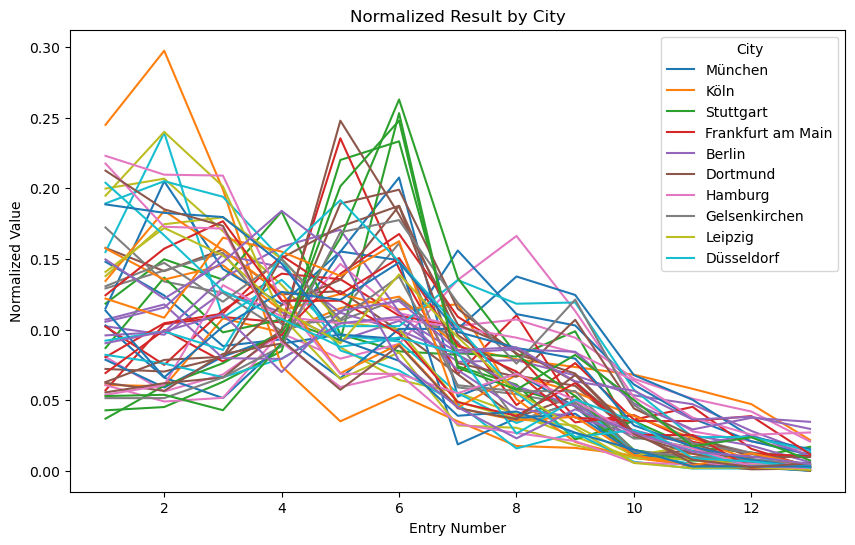

In [14]:
import matplotlib.pyplot as plt

# Extract unique cities for color differentiation
cities = combined_df['City'].unique()
colors = plt.cm.get_cmap('tab10', len(cities))

# Create a dictionary to store colors for each city
city_colors = {city: colors(i) for i, city in enumerate(cities)}

plt.figure(figsize=(10, 6))

# Plot each row in NormalizedResult with a different color per city
for _, row in combined_df.iterrows():
    city = row['City']
    plt.plot(range(1, 14), row['NormalizedResult'], color=city_colors[city], label=city)

# Add labels and title
plt.xlabel('Entry Number')
plt.ylabel('Normalized Value')
plt.title('Normalized Result by City')

# Create a custom legend with unique cities
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title="City", loc='upper right')

# Display the plot
plt.show()



C:\Users\alejandra.rincon\AppData\Local\Temp\ipykernel_40144\1140368796.py:19: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


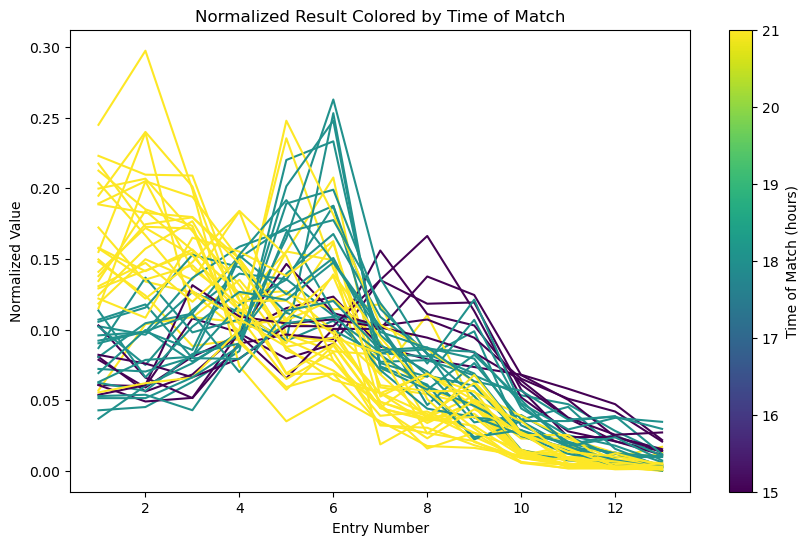

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Normalize the color map based on the time of the match
times = combined_df['Time'].apply(lambda x: int(x.split(':')[0]) + int(x.split(':')[1])/60)  # Convert time to decimal hours
norm = plt.Normalize(vmin=times.min(), vmax=times.max())
cmap = plt.cm.viridis

plt.figure(figsize=(10, 6))

# Plot each row in NormalizedResult with color based on time of the match
for _, row in combined_df.iterrows():
    time = int(row['Time'].split(':')[0]) + int(row['Time'].split(':')[1])/60
    plt.plot(range(1, 14), row['NormalizedResult'], color=cmap(norm(time)))

# Add color bar to represent time
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Time of Match (hours)')

# Add labels and title
plt.xlabel('Entry Number')
plt.ylabel('Normalized Value')
plt.title('Normalized Result Colored by Time of Match')

# Display the plot
plt.show()


C:\Users\alejandra.rincon\AppData\Local\Temp\ipykernel_40144\3762008899.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(cities))


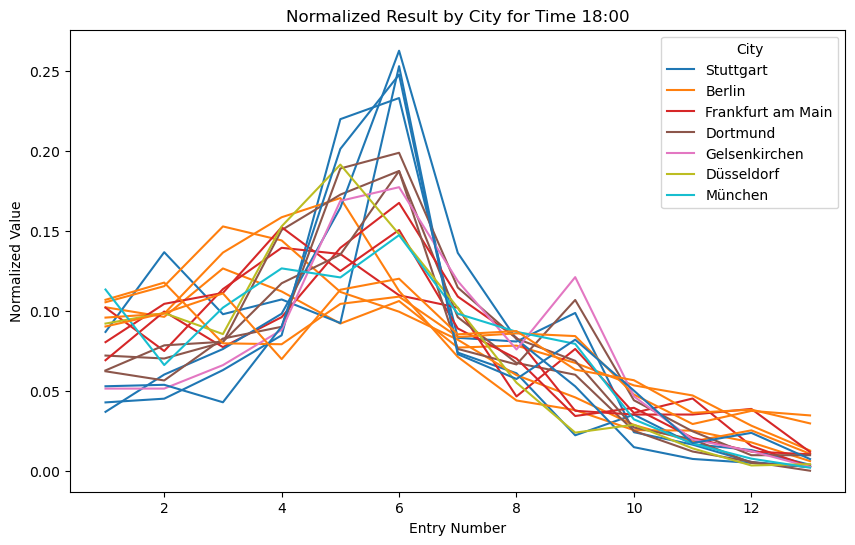

In [16]:
import matplotlib.pyplot as plt

# Filter the DataFrame to include only rows where Time is '18:00'
filtered_df = combined_df[combined_df['Time'] == '18:00']

# Extract unique cities for color differentiation
cities = filtered_df['City'].unique()
colors = plt.cm.get_cmap('tab10', len(cities))

# Create a dictionary to store colors for each city
city_colors = {city: colors(i) for i, city in enumerate(cities)}

plt.figure(figsize=(10, 6))

# Plot each row in NormalizedResult with a different color per city
for _, row in filtered_df.iterrows():
    city = row['City']
    plt.plot(range(1, 14), row['NormalizedResult'], color=city_colors[city], label=city)

# Add labels and title
plt.xlabel('Entry Number')
plt.ylabel('Normalized Value')
plt.title('Normalized Result by City for Time 18:00')

# Create a custom legend with unique cities
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title="City", loc='upper right')

# Display the plot
plt.show()



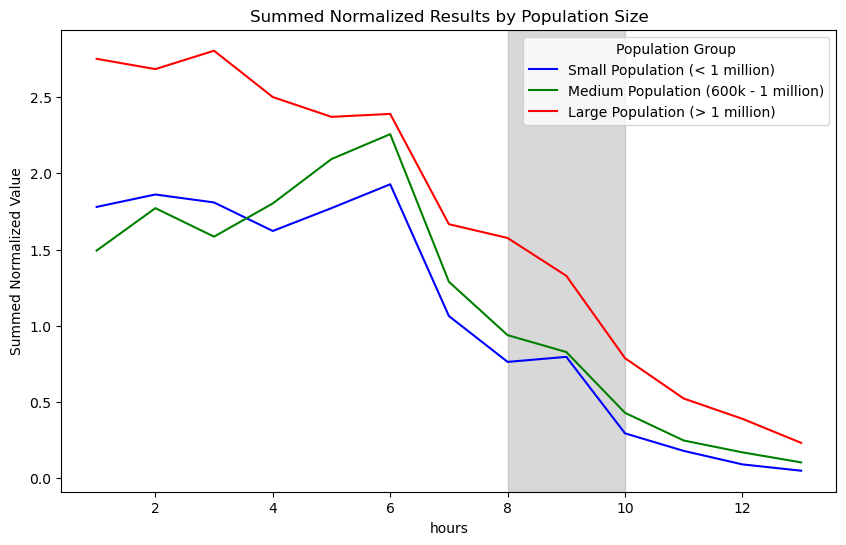

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Assume the 'Population' column exists in the combined_df with the population size for each city

# Classify cities based on population size
small_cities = combined_df[combined_df['Population'] < 600000]['City'].unique()
medium_cities = combined_df[(combined_df['Population'] >= 600_000) & (combined_df['Population'] < 1_000_000)]['City'].unique()
large_cities = combined_df[combined_df['Population'] >= 1_000_000]['City'].unique()

# Sum the 'NormalizedResult' vectors for small, medium, and large cities
small_group_sum = combined_df[combined_df['City'].isin(small_cities)].groupby('City')['NormalizedResult'].apply(lambda x: np.sum(np.array(x.tolist()), axis=0)).sum()
medium_group_sum = combined_df[combined_df['City'].isin(medium_cities)].groupby('City')['NormalizedResult'].apply(lambda x: np.sum(np.array(x.tolist()), axis=0)).sum()
large_group_sum = combined_df[combined_df['City'].isin(large_cities)].groupby('City')['NormalizedResult'].apply(lambda x: np.sum(np.array(x.tolist()), axis=0)).sum()

plt.figure(figsize=(10, 6))

# Add grey shaded area from 4 to 6 on the x-axis
plt.axvspan(8, 10, color='grey', alpha=0.3)

# Plot the summed vectors for small, medium, and large population groups
plt.plot(range(1, 14), small_group_sum, label='Small Population (< 1 million)', color='blue')
plt.plot(range(1, 14), medium_group_sum, label='Medium Population (600k - 1 million)', color='green')
plt.plot(range(1, 14), large_group_sum, label='Large Population (> 1 million)', color='red')

# Add labels and title
plt.xlabel('hours')
plt.ylabel('Summed Normalized Value')
plt.title('Summed Normalized Results by Population Size')
plt.legend(title="Population Group", loc='upper right')

# Display the plot
plt.show()


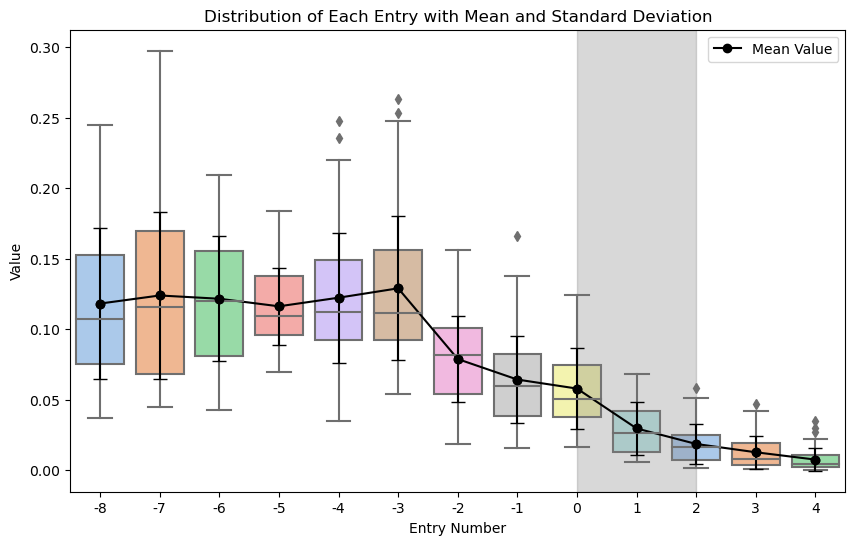

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you have a DataFrame called `combined_df` with a 'NormalizedResult' column
# which contains lists of 9 values (one per entry)

# Extract all entries into separate lists
entries = np.array(combined_df['NormalizedResult'].tolist()).T

# Calculate means and standard deviations for each entry
means = np.mean(entries, axis=1)
std_devs = np.std(entries, axis=1)

# Create the plot
plt.figure(figsize=(10, 6))
plt.axvspan(8, 10, color='grey', alpha=0.3)

# Create boxplots for each entry
sns.boxplot(data=entries.T, palette="pastel")

# Plot the means and connect them with a line
plt.plot(range(13), means, marker='o', color='black', label='Mean Value')

# Add error bars for standard deviations
plt.errorbar(range(13), means, yerr=std_devs, fmt='o', color='black', capsize=5)
plt.xticks(ticks=range(0, 13), labels=range(-8, 5))
# Add labels and title
plt.xlabel('Entry Number')
plt.ylabel('Value')
plt.title('Distribution of Each Entry with Mean and Standard Deviation')
plt.legend()

# Display the plot
plt.show()


In [30]:
# Get the unique city names with population under 1.5 million
small_cities = combined_df[combined_df['Population'] < 600000]['City'].unique()

# Filter the DataFrame for those small cities
small_cities_df = combined_df[combined_df['City'].isin(small_cities)]


In [31]:
small_cities_df

,City,Date,Time,Population,Match,Group,Result,MatchLabel,NormalizedResult
7,Dortmund,2024-06-15,21:00,588462,Italy 2 - 1 Albania,Group B,"[134.0, 120.0, 133.0, 106.0, 108.0, 84.0, 58.0...",Italy 2 - 1 Albania,"[0.15783274440518258, 0.1413427561837456, 0.15..."
9,Gelsenkirchen,2024-06-20,21:00,260000,Spain 1 - 0 Italy,Group B,"[108.0, 84.0, 79.0, 62.0, 70.0, 101.0, 37.0, 3...",Spain 1 - 0 Italy,"[0.1722488038277512, 0.1339712918660287, 0.125..."
10,Leipzig,2024-06-24,21:00,597493,Croatia 1 - 1 Italy,Group B,"[199.0, 206.0, 169.0, 131.0, 87.0, 64.0, 55.0,...",Croatia 1 - 1 Italy,"[0.19979919678714858, 0.20682730923694778, 0.1..."
13,Gelsenkirchen,2024-06-16,21:00,260000,Serbia 0 - 1 England,Group C,"[51.0, 56.0, 61.0, 41.0, 42.0, 48.0, 36.0, 14....",Serbia 0 - 1 England,"[0.1291139240506329, 0.14177215189873418, 0.15..."
21,Leipzig,2024-06-21,21:00,597493,Netherlands 0 - 0 France,Group D,"[169.0, 214.0, 220.0, 184.0, 129.0, 123.0, 60....",Netherlands 0 - 0 France,"[0.13784665579119088, 0.17455138662316477, 0.1..."
23,Dortmund,2024-06-25,18:00,588462,France 1 - 1 Poland,Group D,"[78.0, 76.0, 87.0, 163.0, 187.0, 203.0, 104.0,...",France 1 - 1 Poland,"[0.07208872458410351, 0.07024029574861368, 0.0..."
30,Dortmund,2024-06-18,18:00,588462,Turkey 3 - 1 Georgia,Group F,"[76.0, 69.0, 101.0, 110.0, 231.0, 243.0, 140.0...",Turkey 3 - 1 Georgia,"[0.062244062244062245, 0.056511056511056514, 0..."
31,Leipzig,2024-06-18,21:00,597493,Portugal 2 - 1 Czechia,Group F,"[237.0, 292.0, 245.0, 133.0, 79.0, 102.0, 39.0...",Portugal 2 - 1 Czechia,"[0.19474116680361545, 0.2399342645850452, 0.20..."
33,Dortmund,2024-06-22,18:00,588462,Turkey 0 - 3 Portugal,Group F,"[84.0, 105.0, 108.0, 157.0, 181.0, 251.0, 102....",Turkey 0 - 3 Portugal,"[0.06278026905829596, 0.07847533632286996, 0.0..."
34,Gelsenkirchen,2024-06-26,21:00,260000,Georgia 2 - 0 Portugal,Group F,"[95.0, 107.0, 87.0, 109.0, 78.0, 100.0, 44.0, ...",Georgia 2 - 0 Portugal,"[0.13067400275103164, 0.14718019257221457, 0.1..."


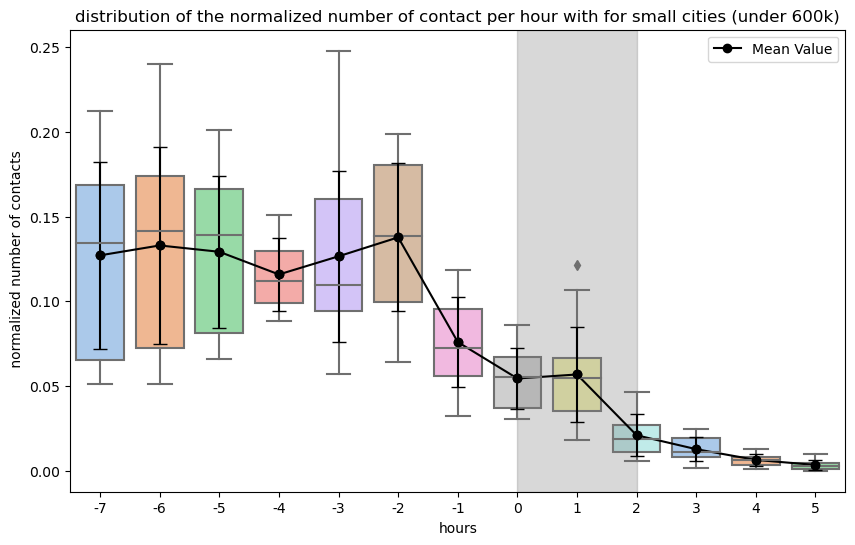

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Extract all entries into separate lists for small cities
entries = np.array(small_cities_df['NormalizedResult'].tolist()).T

# Calculate means and standard deviations for each entry
means = np.mean(entries, axis=1)
std_devs = np.std(entries, axis=1)

# Create the plot
plt.figure(figsize=(10, 6))

# Add grey shaded area from 3 to 5 on the x-axis
plt.axvspan(7, 9, color='grey', alpha=0.3)

# Create boxplots for each entry
sns.boxplot(data=entries.T, palette="pastel")

# Plot the means and connect them with a line
plt.plot(range(13), means, marker='o', color='black', label='Mean Value')

# Add error bars for standard deviations
plt.errorbar(range(13), means, yerr=std_devs, fmt='o', color='black', capsize=5)
# Set x-ticks from -3 to 5
plt.xticks(ticks=range(13), labels=range(-7, 6))

# Add labels and title
plt.xlabel('hours')
plt.ylabel(' normalized number of contacts')
plt.title('distribution of the normalized number of contact per hour with for small cities (under 600k)')
plt.legend()

# Display the plot
plt.show()


In [35]:
# Get the unique city names with population between 600,000 and 1 million
medium_cities = combined_df[(combined_df['Population'] > 600_000) & (combined_df['Population'] < 1_000_000)]['City'].unique()

# Filter the DataFrame for those medium cities
medium_cities_df = combined_df[combined_df['City'].isin(medium_cities)]



In [37]:
medium_cities_df

,City,Date,Time,Population,Match,Group,Result,MatchLabel,NormalizedResult
2,Stuttgart,2024-06-19,18:00,634830,Germany 2 - 0 Hungary,Group A,"[55.0, 58.0, 81.0, 109.0, 283.0, 300.0, 107.0,...",Germany 2 - 0 Hungary,"[0.042768273716951785, 0.04510108864696734, 0...."
4,Frankfurt am Main,2024-06-23,21:00,753056,Switzerland 1 - 1 Germany,Group A,"[45.0, 82.0, 86.0, 83.0, 186.0, 113.0, 54.0, 8...",Switzerland 1 - 1 Germany,"[0.056962025316455694, 0.10379746835443038, 0...."
5,Stuttgart,2024-06-23,21:00,634830,Scotland 0 - 1 Hungary,Group A,"[49.0, 62.0, 56.0, 76.0, 40.0, 35.0, 34.0, 24....",Scotland 0 - 1 Hungary,"[0.11835748792270531, 0.1497584541062802, 0.13..."
11,Düsseldorf,2024-06-24,21:00,619294,Albania 0 - 1 Spain,Group B,"[110.0, 170.0, 77.0, 96.0, 68.0, 65.0, 39.0, 2...",Albania 0 - 1 Spain,"[0.15492957746478872, 0.23943661971830985, 0.1..."
12,Stuttgart,2024-06-16,18:00,634830,Slovenia 1 - 1 Denmark,Group C,"[47.0, 74.0, 53.0, 58.0, 50.0, 137.0, 40.0, 33...",Slovenia 1 - 1 Denmark,"[0.08687615526802218, 0.1367837338262477, 0.09..."
15,Frankfurt am Main,2024-06-20,18:00,753056,Denmark 1 - 1 England,Group C,"[79.0, 58.0, 88.0, 108.0, 105.0, 85.0, 79.0, 3...",Denmark 1 - 1 England,"[0.1020671834625323, 0.07493540051679587, 0.11..."
19,Düsseldorf,2024-06-17,21:00,619294,Austria 0 - 1 France,Group D,"[120.0, 130.0, 123.0, 95.0, 54.0, 45.0, 30.0, ...",Austria 0 - 1 France,"[0.1892744479495268, 0.20504731861198738, 0.19..."
25,Frankfurt am Main,2024-06-17,18:00,753056,Belgium 0 - 1 Slovakia,Group E,"[47.0, 61.0, 65.0, 89.0, 73.0, 88.0, 52.0, 41....",Belgium 0 - 1 Slovakia,"[0.08047945205479452, 0.10445205479452055, 0.1..."
26,Düsseldorf,2024-06-21,15:00,617280,Slovakia 1 - 2 Ukraine,Group E,"[93.0, 86.0, 75.0, 90.0, 116.0, 116.0, 153.0, ...",Slovakia 1 - 2 Ukraine,"[0.0820829655781112, 0.07590467784642542, 0.06..."
28,Frankfurt am Main,2024-06-26,18:00,753056,Slovakia 1 - 1 Romania,Group E,"[59.0, 85.0, 66.0, 82.0, 119.0, 143.0, 93.0, 7...",Slovakia 1 - 1 Romania,"[0.06916764361078546, 0.09964830011723329, 0.0..."


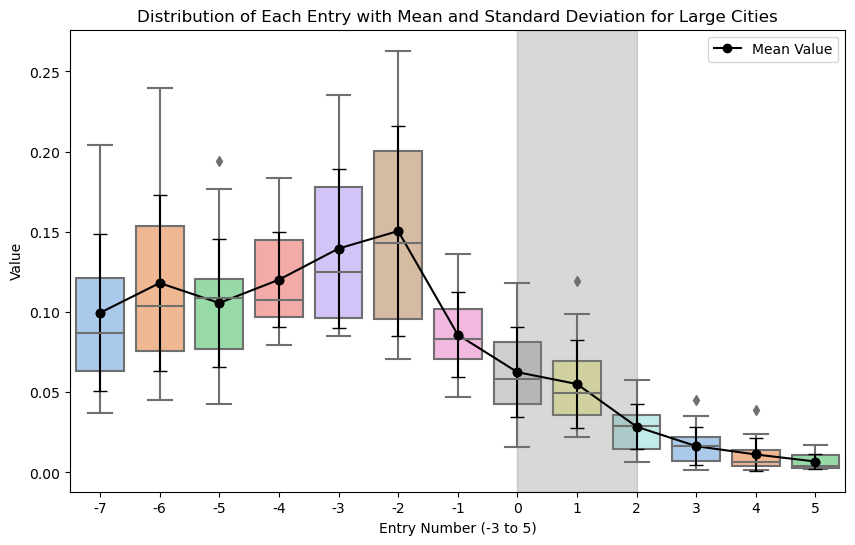

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you have already defined `large_cities_df` by filtering `combined_df`

# Extract all entries into separate lists for large cities
entries = np.array(medium_cities_df['NormalizedResult'].tolist()).T

# Calculate means and standard deviations for each entry
means = np.mean(entries, axis=1)
std_devs = np.std(entries, axis=1)

# Create the plot
plt.figure(figsize=(10, 6))

# Add grey shaded area from 3 to 5 on the x-axis
plt.axvspan(7, 9, color='grey', alpha=0.3)

# Create boxplots for each entry
sns.boxplot(data=entries.T, palette="pastel")

# Plot the means and connect them with a line
plt.plot(range(13), means, marker='o', color='black', label='Mean Value')

# Add error bars for standard deviations
plt.errorbar(range(13), means, yerr=std_devs, fmt='o', color='black', capsize=5)

# Set x-ticks from -3 to 5
plt.xticks(ticks=range(13), labels=range(-7, 6))

# Add labels and title
plt.xlabel('Entry Number (-3 to 5)')
plt.ylabel('Value')
plt.title('Distribution of Each Entry with Mean and Standard Deviation for Large Cities')
plt.legend()

# Display the plot
plt.show()


In [39]:
# Get the unique city names with population under 1.5 million
large_cities = combined_df[combined_df['Population'] > 1000000]['City'].unique()

# Filter the DataFrame for those small cities
large_cities_df = combined_df[combined_df['City'].isin(large_cities)]


In [40]:
large_cities_df

,City,Date,Time,Population,Match,Group,Result,MatchLabel,NormalizedResult
0,München,2024-06-14,21:00,1471508,Germany 5 - 1 Scotland,Group A,"[62.0, 52.0, 37.0, 39.0, 65.0, 87.0, 22.0, 29....",Germany 5 - 1 Scotland,"[0.14797136038186157, 0.12410501193317422, 0.0..."
1,Köln,2024-06-15,15:00,1085664,Hungary 1 - 3 Switzerland,Group A,"[67.0, 66.0, 119.0, 108.0, 127.0, 136.0, 97.0,...",Hungary 1 - 3 Switzerland,"[0.06074342701722575, 0.05983680870353581, 0.1..."
3,Köln,2024-06-19,21:00,1085664,Scotland 1 - 1 Switzerland,Group A,"[182.0, 221.0, 148.0, 55.0, 26.0, 40.0, 26.0, ...",Scotland 1 - 1 Switzerland,"[0.2449528936742934, 0.297442799461642, 0.1991..."
6,Berlin,2024-06-15,18:00,3769000,Spain 3 - 0 Croatia,Group B,"[341.0, 321.0, 422.0, 374.0, 307.0, 354.0, 257...",Spain 3 - 0 Croatia,"[0.10231023102310231, 0.0963096309630963, 0.12..."
8,Hamburg,2024-06-19,15:00,1841179,Croatia 2 - 2 Albania,Group B,"[194.0, 135.0, 164.0, 234.0, 191.0, 216.0, 325...",Croatia 2 - 2 Albania,"[0.08063175394846218, 0.05610972568578554, 0.0..."
14,München,2024-06-20,15:00,1472000,Slovenia 1 - 1 Serbia,Group C,"[64.0, 41.0, 32.0, 56.0, 60.0, 58.0, 97.0, 69....",Slovenia 1 - 1 Serbia,"[0.10289389067524116, 0.06591639871382636, 0.0..."
16,Köln,2024-06-25,21:00,1085664,England 0 - 0 Slovenia,Group C,"[171.0, 147.0, 158.0, 123.0, 136.0, 124.0, 128...",England 0 - 0 Slovenia,"[0.1574585635359116, 0.13535911602209943, 0.14..."
17,München,2024-06-25,21:00,1472000,Denmark 0 - 0 Serbia,Group C,"[37.0, 66.0, 46.0, 38.0, 50.0, 48.0, 6.0, 12.0...",Denmark 0 - 0 Serbia,"[0.11490683229813664, 0.20496894409937888, 0.1..."
18,Hamburg,2024-06-16,15:00,1841179,Poland 1 - 2 Netherlands,Group D,"[94.0, 76.0, 80.0, 152.0, 227.0, 173.0, 159.0,...",Poland 1 - 2 Netherlands,"[0.06064516129032258, 0.04903225806451613, 0.0..."
20,Berlin,2024-06-21,18:00,3769000,Poland 1 - 3 Austria,Group D,"[409.0, 448.0, 593.0, 559.0, 434.0, 386.0, 318...",Poland 1 - 3 Austria,"[0.10546673543063435, 0.11552346570397112, 0.1..."


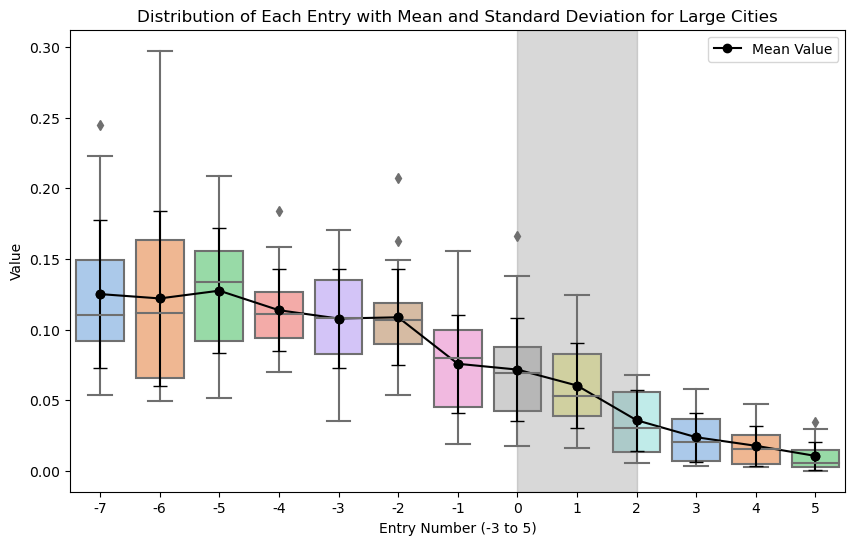

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you have already defined `large_cities_df` by filtering `combined_df`

# Extract all entries into separate lists for large cities
entries = np.array(large_cities_df['NormalizedResult'].tolist()).T

# Calculate means and standard deviations for each entry
means = np.mean(entries, axis=1)
std_devs = np.std(entries, axis=1)

# Create the plot
plt.figure(figsize=(10, 6))

# Add grey shaded area from 3 to 5 on the x-axis
plt.axvspan(7, 9, color='grey', alpha=0.3)

# Create boxplots for each entry
sns.boxplot(data=entries.T, palette="pastel")

# Plot the means and connect them with a line
plt.plot(range(13), means, marker='o', color='black', label='Mean Value')

# Add error bars for standard deviations
plt.errorbar(range(13), means, yerr=std_devs, fmt='o', color='black', capsize=5)

# Set x-ticks from -3 to 5
plt.xticks(ticks=range(13), labels=range(-7, 6))

# Add labels and title
plt.xlabel('Entry Number (-3 to 5)')
plt.ylabel('Value')
plt.title('Distribution of Each Entry with Mean and Standard Deviation for Large Cities')
plt.legend()

# Display the plot
plt.show()


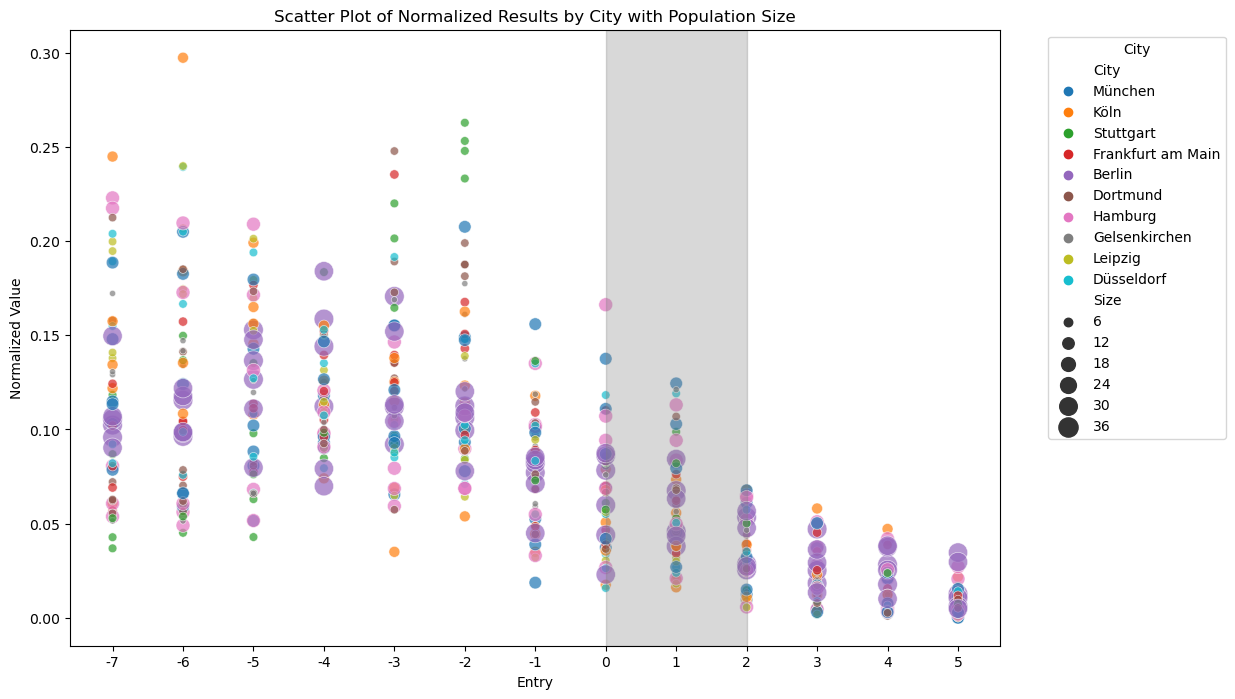

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume the combined_df DataFrame is already loaded and contains 'City', 'Population', and 'NormalizedResult'

# Expand the 'NormalizedResult' column into separate columns for each entry
expanded_df = pd.DataFrame(combined_df['NormalizedResult'].tolist(), index=combined_df.index)
expanded_df.columns = [f'Entry {i+1}' for i in range(expanded_df.shape[1])]

# Add back the 'City' and 'Population' columns
expanded_df['City'] = combined_df['City']
expanded_df['Population'] = combined_df['Population']

# Melt the DataFrame to get a long-form DataFrame suitable for seaborn
melted_df = pd.melt(expanded_df, id_vars=['City', 'Population'], var_name='Entry', value_name='Normalized Value')

# Map each city's population to point size
melted_df['Size'] = melted_df['Population'] / 100000  # Adjust scaling factor as needed

# Create the plot
plt.figure(figsize=(12, 8))

# Plot using Seaborn scatterplot
sns.scatterplot(data=melted_df, x='Entry', y='Normalized Value', 
                hue='City', size='Size', sizes=(20, 200), alpha=0.7, palette='tab10')


# Set x-ticks from -3 to 5
plt.xticks(ticks=range(13), labels=range(-7, 6))
plt.axvspan(7, 9, color='grey', alpha=0.3)

# Add labels and title
plt.xlabel('Entry')
plt.ylabel('Normalized Value')
plt.title('Scatter Plot of Normalized Results by City with Population Size')
plt.legend(title="City", loc='upper right', bbox_to_anchor=(1.25, 1))

# Display the plot
plt.show()


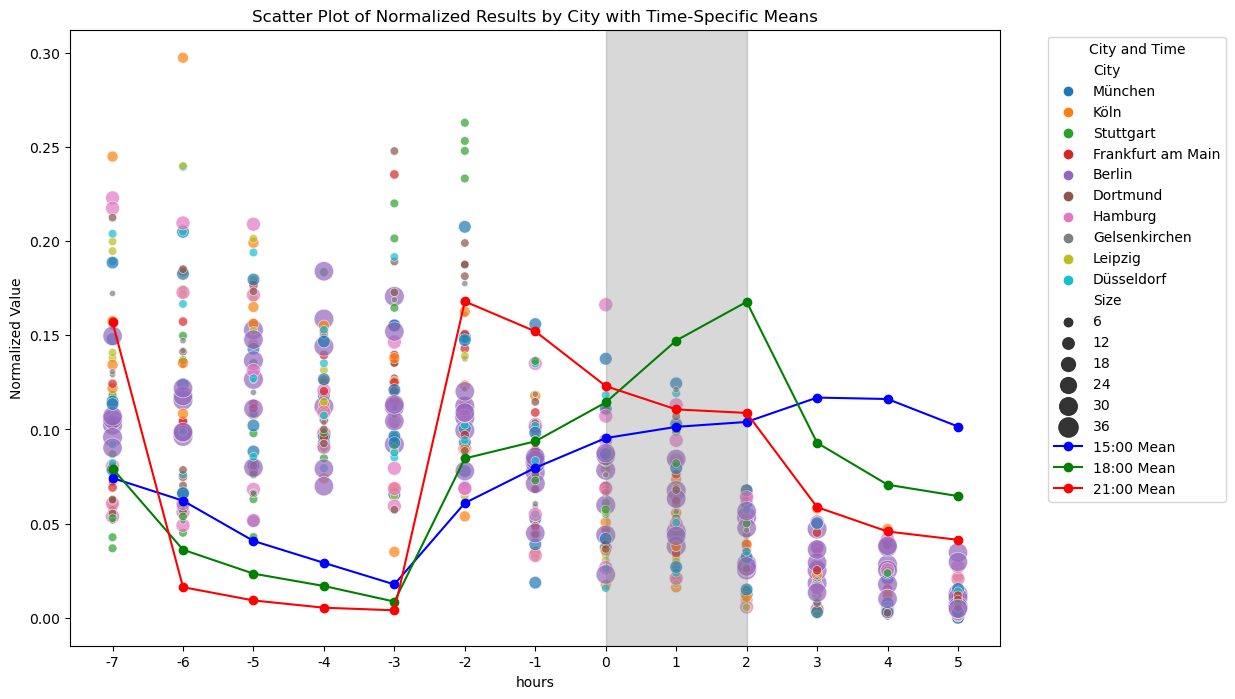

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume the combined_df DataFrame is already loaded and contains 'City', 'Population', 'Time', and 'NormalizedResult'

# Expand the 'NormalizedResult' column into separate columns for each entry
expanded_df = pd.DataFrame(combined_df['NormalizedResult'].tolist(), index=combined_df.index)
expanded_df.columns = [f'Entry {i+1}' for i in range(expanded_df.shape[1])]

# Add back the 'City', 'Population', and 'Time' columns
expanded_df['City'] = combined_df['City']
expanded_df['Population'] = combined_df['Population']
expanded_df['Time'] = combined_df['Time']

# Melt the DataFrame to get a long-form DataFrame suitable for seaborn
melted_df = pd.melt(expanded_df, id_vars=['City', 'Population', 'Time'], 
                    var_name='Entry', value_name='Normalized Value')

# Map each city's population to point size
melted_df['Size'] = melted_df['Population'] / 100000  # Adjust scaling factor as needed

# Filter to include only the times of interest
filtered_df = melted_df[melted_df['Time'].isin(['15:00', '18:00', '21:00'])]

# Create the plot
plt.figure(figsize=(12, 8))

# Plot using Seaborn scatterplot
sns.scatterplot(data=filtered_df, x='Entry', y='Normalized Value', 
                hue='City', size='Size', sizes=(20, 200), alpha=0.7, palette='tab10')

# Calculate and plot the mean normalized values for each entry by time
mean_values = filtered_df.groupby(['Entry', 'Time'])['Normalized Value'].mean().unstack()

# Plot lines connecting mean points for each time
plt.plot(range(13), mean_values['15:00'], marker='o', color='blue', linestyle='-', label='15:00 Mean')
plt.plot(range(13), mean_values['18:00'], marker='o', color='green', linestyle='-', label='18:00 Mean')
plt.plot(range(13), mean_values['21:00'], marker='o', color='red', linestyle='-', label='21:00 Mean')


# Set x-ticks from -3 to 5
plt.xticks(ticks=range(13), labels=range(-7, 6))
plt.axvspan(7, 9, color='grey', alpha=0.3)
plt.xlabel('hours')
plt.ylabel('Normalized Value')
plt.title('Scatter Plot of Normalized Results by City with Time-Specific Means')
plt.legend(title="City and Time", loc='upper right', bbox_to_anchor=(1.25, 1))

# Display the plot
plt.show()


## German matches

C:\Users\alejandra.rincon\AppData\Local\Temp\ipykernel_40144\191264242.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  germany_matches_df['Hour'] = pd.to_datetime(germany_matches_df['Time']).dt.hour


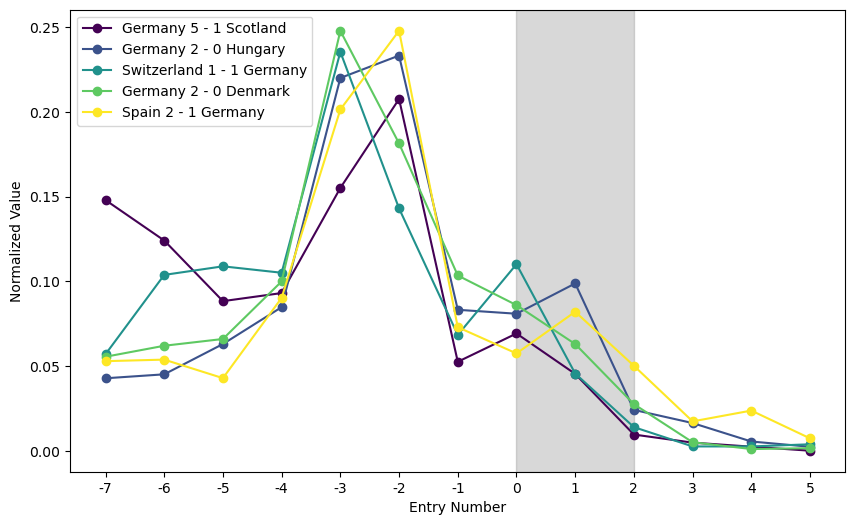

In [47]:
# Assuming `combined_df` is the main dataframe
# Filter for rows where the match involves Germany
germany_matches_df = combined_df[combined_df['Match'].str.contains("Germany")].reset_index(drop=True)

# Extract the time information and convert it to a numerical value for coloring
germany_matches_df['Hour'] = pd.to_datetime(germany_matches_df['Time']).dt.hour
# Extract all entries into separate lists for Germany matches
entries = np.array(germany_matches_df['NormalizedResult'].tolist()).T
# Define x_ticks from -9 to 6
x_ticks = list(range(-7, 6))

# Create the plot
plt.figure(figsize=(10, 6))

# Plot a line for each German match with a unique color
num_matches = len(germany_matches_df)
colors = plt.cm.viridis(np.linspace(0, 1, num_matches))

for index, row in germany_matches_df.iterrows():
    plt.plot(range(len(row['NormalizedResult'])), row['NormalizedResult'], marker='o', label=row['Match'], color=colors[index])

# Set the x-ticks
entries = np.array(germany_matches_df['NormalizedResult'].tolist())

plt.xticks(ticks=range(len(entries[0])), labels=x_ticks[:len(entries[0])])
plt.axvspan(7, 9, color='grey', alpha=0.3)

# Add labels and title
plt.xlabel('Entry Number')
plt.ylabel('Normalized Value')
#plt.title('Normalized Results of German Matches with Unique Colors for Each Match')
plt.legend()

# Display the plot
plt.show()

## Heatmaps stadiums per city


In [40]:
slots = 24
start_date = datetime.strptime('2024-05-01', '%Y-%m-%d')
end_date = datetime.strptime('2024-07-30', '%Y-%m-%d')
#city='Gelsenkirchen'


# Event details from combined_df
event_details = combined_df[['City', 'Date', 'Time', 'Match']]

# Convert Date column to datetime
event_details['Date'] = pd.to_datetime(event_details['Date'])

# Extract event times and dates
event_times = {
    (row['City'], datetime.strptime(row['Date'].strftime('%Y-%m-%d') + ' ' + row['Time'], '%Y-%m-%d %H:%M')): row['Match']
    for index, row in event_details.iterrows()
    if start_date <= row['Date'] <= end_date
}


# Generate the list of days
delta = end_date - start_date
days_list = [(start_date + timedelta(days=i)).strftime('%Y-%m-%d') for i in range(delta.days + 1)]
print(days_list)

df_total = pd.DataFrame()
data_dict = {}
for day in days_list:
    query = f"""
    WITH filtered_cnv AS (
        SELECT cnv.*, t2p.*
        FROM covid_network_sdkv6_tl5_10m cnv
        JOIN tile2plz t2p ON cnv.tile_id = t2p.tile_id
        WHERE "day" = '{day}'
    ), city_filtered AS (
        SELECT filtered_cnv.*
        FROM filtered_cnv
        JOIN covid_plz_populate cpp ON filtered_cnv.plz = cpp.id_plz5
        WHERE cpp.city = '{city}'
    )
    SELECT cf.*, tbo.*
    FROM city_filtered cf
    LEFT JOIN planet_osm_polygon tbo ON ST_Intersects(cf.geopoint, tbo.way)
    WHERE tbo.leisure = 'stadium';
    """
    didlist=[]
    pairlist=[]

    df_day= pd.DataFrame(pd.read_sql_query(query, conn))
    transformer = Transformer.from_crs("epsg:3857", "epsg:4326")

    # iterate over contact events
    for dids, sources, in_stad, point, time in zip(df_day.dids, df_day.sources, df_day.dist_stads, df_day.geopoint, df_day.stime):
        ngps = 1 if (in_stad==True) else 0
        for i, si in zip(dids, sources[1:-1].split(',')):
            for j, sj in zip(dids, sources[1:-1].split(',')):
                if i < j and [si, sj].count('GPS') >= ngps:
                    # collect dids in did list
                    didlist.append(i)
                    didlist.append(j)
                    bytes_object = binascii.unhexlify(point)
                    geometry = wkb.loads(bytes_object)
                    # Transformer from EPSG:3857 to EPSG:4326

                    # Assuming that `geometry` is a Point
                    lon, lat = transformer.transform(geometry.x, geometry.y)
                    # collect pairs of dids in pair list
                    pairlist.append((i, j, (lon, lat, time)))

    # get unique dids and did pairs
    print(f"Checkpoint 1 at: {datetime.now()}")
    didlist, pairlist = list(set(didlist)), list(set(pairlist))
    print(len(didlist))

    G = nx.Graph()
    G.add_nodes_from(didlist)
    print(f"Checkpoint 2 at: {datetime.now()}")

    pairlist_multiple = consolidate_list(pairlist)
    pairlist_multiple = [(node1, node2, sort_time(another_list)) for node1, node2, another_list in pairlist_multiple]
    G.add_weighted_edges_from(pairlist_multiple)
    print(len(G.edges()))
    print(len(G.nodes()))
    edges = list(G.edges(data=True))

    for edge in edges:
        node1, node2, attr = edge
        for weight in attr['weight']:
            matrix = np.zeros((1, slots), dtype=int)
            gps_point = weight[:2]
            timestamp = weight[2]
            if timestamp.tzinfo is not None:
                timestamp = timestamp.tz_localize(None)
            hour = timestamp.hour
            minute = timestamp.minute
            interval_index = (hour * 60 + minute) // 60
            matrix[0][interval_index] = 1
            key = (node1, node2, day)
            if key in data_dict:
                data_dict[key]['vector'] += matrix.flatten()
                data_dict[key]['gps_points'].append(gps_point)
            else:
                data_dict[key] = {
                    'did1': node1,
                    'did2': node2,
                    'vector': matrix.flatten(),
                    'gps_points': [gps_point],
                    'day': day
                }
    


C:\Users\alejandra.rincon\AppData\Local\Temp\ipykernel_35284\1413360156.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_details['Date'] = pd.to_datetime(event_details['Date'])


['2024-05-01', '2024-05-02', '2024-05-03', '2024-05-04', '2024-05-05', '2024-05-06', '2024-05-07', '2024-05-08', '2024-05-09', '2024-05-10', '2024-05-11', '2024-05-12', '2024-05-13', '2024-05-14', '2024-05-15', '2024-05-16', '2024-05-17', '2024-05-18', '2024-05-19', '2024-05-20', '2024-05-21', '2024-05-22', '2024-05-23', '2024-05-24', '2024-05-25', '2024-05-26', '2024-05-27', '2024-05-28', '2024-05-29', '2024-05-30', '2024-05-31', '2024-06-01', '2024-06-02', '2024-06-03', '2024-06-04', '2024-06-05', '2024-06-06', '2024-06-07', '2024-06-08', '2024-06-09', '2024-06-10', '2024-06-11', '2024-06-12', '2024-06-13', '2024-06-14', '2024-06-15', '2024-06-16', '2024-06-17', '2024-06-18', '2024-06-19', '2024-06-20', '2024-06-21', '2024-06-22', '2024-06-23', '2024-06-24', '2024-06-25', '2024-06-26', '2024-06-27', '2024-06-28', '2024-06-29', '2024-06-30', '2024-07-01', '2024-07-02', '2024-07-03', '2024-07-04', '2024-07-05', '2024-07-06', '2024-07-07', '2024-07-08', '2024-07-09', '2024-07-10', '2024

Checkpoint 1 at: 2024-08-14 15:50:05.183642
0
Checkpoint 2 at: 2024-08-14 15:50:05.183642
0
Checkpoint 1 at: 2024-08-14 15:50:06.056503
0
Checkpoint 2 at: 2024-08-14 15:50:06.056503
0
Checkpoint 1 at: 2024-08-14 15:50:06.893639
2
Checkpoint 2 at: 2024-08-14 15:50:06.893639
1
Checkpoint 1 at: 2024-08-14 15:50:07.960627
0
Checkpoint 2 at: 2024-08-14 15:50:07.960627
0
Checkpoint 1 at: 2024-08-14 15:50:09.804021
0
Checkpoint 2 at: 2024-08-14 15:50:09.804021
0
Checkpoint 1 at: 2024-08-14 15:50:10.813683
39
Checkpoint 2 at: 2024-08-14 15:50:10.813683
249
Checkpoint 1 at: 2024-08-14 15:50:11.863717
30
Checkpoint 2 at: 2024-08-14 15:50:11.871817
177
Checkpoint 1 at: 2024-08-14 15:50:13.103654
0
Checkpoint 2 at: 2024-08-14 15:50:13.103654
0
Checkpoint 1 at: 2024-08-14 15:50:14.099927
38
Checkpoint 2 at: 2024-08-14 15:50:14.104077
265
Checkpoint 1 at: 2024-08-14 15:50:15.376266
0
Checkpoint 2 at: 2024-08-14 15:50:15.376266
0
Checkpoint 1 at: 2024-08-14 15:50:16.113728
2
Checkpoint 2 at: 2024-08-

In [41]:
date_range = [start_date + timedelta(days=x) for x in range((end_date - start_date).days + 1)]
number_of_days = len(date_range)
organized_data = defaultdict(lambda: np.zeros((number_of_days, slots)))


for (did1, did2, date_str), info in data_dict.items():
    date = datetime.strptime(date_str, '%Y-%m-%d')
    index = (date - start_date).days
    if 0 <= index < number_of_days:
        organized_data[(did1, did2)][index, :] = info['vector']
    else:
        print(f"Index {index} is out of bounds for ({did1}, {did2}) with date {date_str}")

df_rows = []

for (did1, did2), vectors in organized_data.items():
    # Create a full vector matrix initialized with zeros
    full_vector_matrix = np.zeros((number_of_days, slots))

    # Directly assign the vectors to the corresponding dates
    full_vector_matrix[:vectors.shape[0], :vectors.shape[1]] = vectors
    # Sum the slots per day
    daily_sums = full_vector_matrix.sum(axis=1)


    # Append to the DataFrame rows
    df_rows.append({'pair': f'{did1}-{did2}', 'vector': full_vector_matrix, 'daily_sums': daily_sums})


In [42]:
df = pd.DataFrame(df_rows)
df['flattened_vector'] = df['vector'].apply(lambda x: x.reshape(-1))

number_of_days = len(df['flattened_vector'].iloc[0]) // slots
heatmap_data = np.zeros((number_of_days, slots))
for _, row in df.iterrows():
    matrix = np.array(row['vector']).reshape(number_of_days, slots)
    heatmap_data += matrix
heatmap_data_df = pd.DataFrame(heatmap_data)




In [43]:
#city='Leipzig'
#heatmap_data_df=pd.read_csv(f'heatmap_data_stadiums_Leipzig.csv')
#heatmap_data = heatmap_data_df.to_numpy()

In [44]:
heatmap_data_df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,40.0,202.0,180.0,103.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
#heatmap_data_df.to_csv(f'heatmap_data_stadiums_{city}.csv', index=False)
# Flip the data for correct orientation
heatmap_data = np.flipud(heatmap_data.T)

305.0


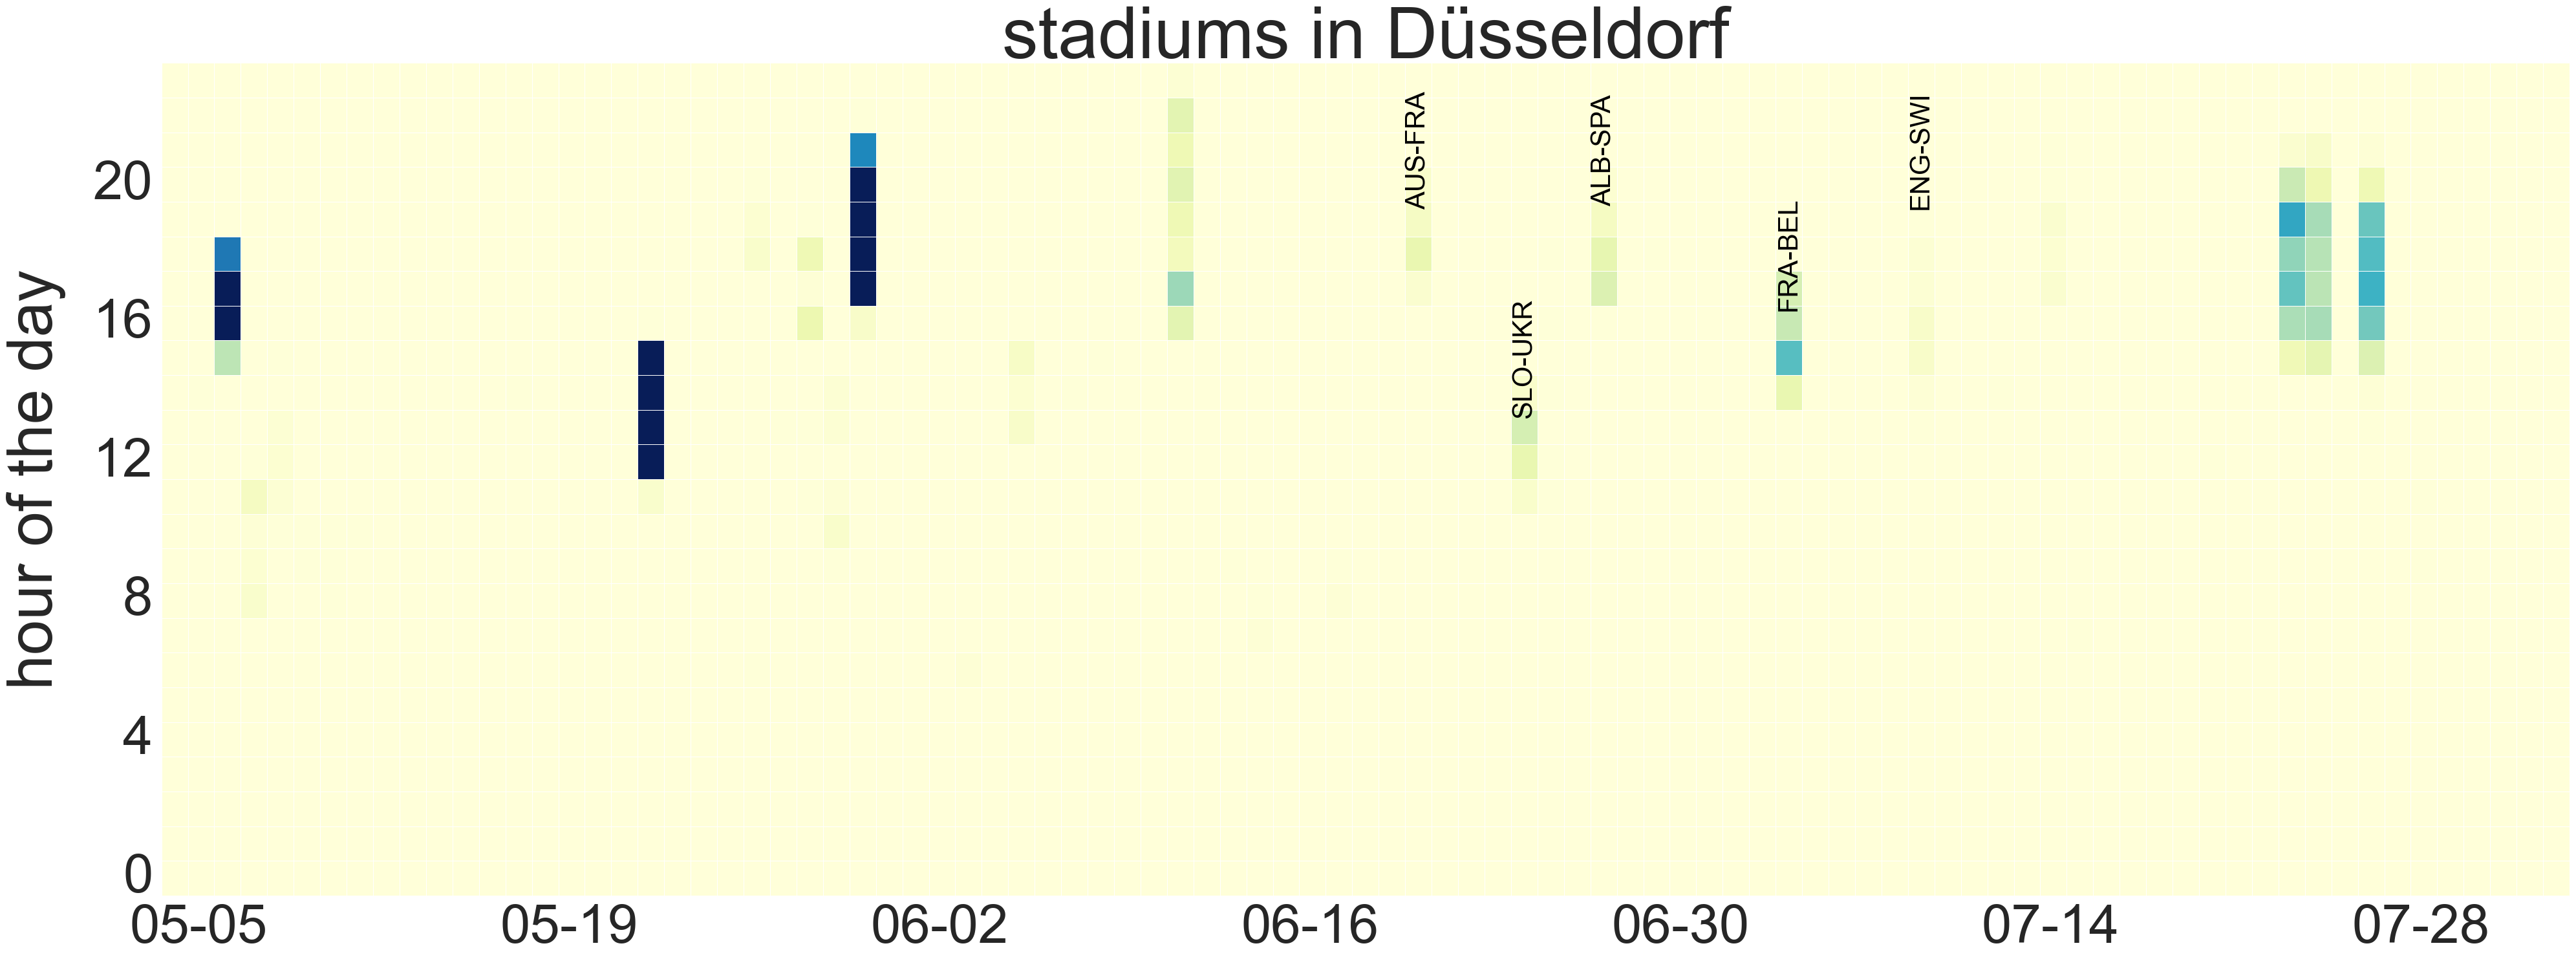

In [46]:
import matplotlib.colors as mcolors

sns.set_context("notebook")
sns.set_style("white")

# Assuming heatmap_data, start_date, number_of_days, slots, city, and event_times are already defined

vmax_auto = np.max(heatmap_data)
print(vmax_auto)
fig, ax = plt.subplots(figsize=(40, 15))

# Create the heatmap without the color bar
cax = sns.heatmap(heatmap_data, cmap='YlGnBu', vmin=0, vmax=150, ax=ax, linewidths=.5, cbar=False)

# Generate all dates within the range
dates = [start_date + timedelta(days=i) for i in range(number_of_days)]

# Identify all Sundays
sundays = [date for date in dates if date.weekday() == 6]

# Select every other Sunday
sundays_every_two_weeks = sundays[::2]

# Positions of the selected Sundays in the dates list
sunday_positions = [dates.index(sunday) for sunday in sundays_every_two_weeks]

# Set x-ticks at the positions of the selected Sundays
ax.set_xticks(sunday_positions)

# Set x-tick labels as the formatted dates
xtick_labels = [sunday.strftime('%m-%d') for sunday in sundays_every_two_weeks]
ax.set_xticklabels(xtick_labels, ha='right', fontsize=60)

# Set y-ticks every 4 hours
ax.set_yticks([i + 3.5 for i in range(0, slots, 4)])  # Ticks at 0, 4, 8, 12, 16, 20

# Set y-tick labels corresponding to every 4 hours
ax.set_yticklabels(reversed(range(0, slots, 4)), fontsize=60, rotation=0)

# Move the y-axis label slightly to the right
ax.set_ylabel("hour of the day", fontsize=70, labelpad=30)  # Adjust 'labelpad' as needed

ax.set_title(f"stadiums in {city}", fontsize=80)

# Define a threshold for deciding if the text color should be orange
threshold=10# Adjust this value based on your data

# Plot events
for (event_city, event_time), event_name in event_times.items():
    if event_city == city:
        event_day_index = (event_time.date() - start_date.date()).days
        event_hour_index = slots - 1 - event_time.hour  # Adjusted for 24 slots

        match_parts = event_name.split(" ")
        team1 = match_parts[0][:3].upper()
        score1 = match_parts[1]
        score2 = match_parts[3]
        team2 = match_parts[4][:3].upper()

        team_abbreviation = f"{team1}-{team2}"
        
        # Determine if the value in heatmap_data is below the threshold
        cell_value = heatmap_data[event_hour_index, event_day_index]
        if cell_value < threshold:
            text_color = 'black'
            font_weight = 'normal'
        else:
            text_color = 'red'
            font_weight = 'bold'
        
        ax.text(event_day_index + 0.5, event_hour_index + 0.5, team_abbreviation,
                ha='center', va='center', color=text_color, fontsize=30, rotation=90)

plt.tight_layout()
plt.show()

In [47]:
#FF450

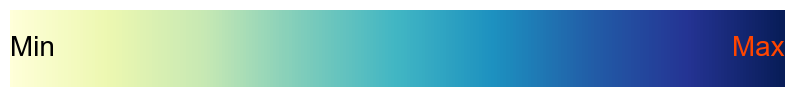

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Define the maximum and minimum values
max_value = 150
min_value = 0

# Use the 'YlGnBu' colormap
cmap = plt.get_cmap('YlGnBu')

# Create a gradient array for the bar
gradient = np.linspace(0, 1, 256).reshape(1, -1)

# Plot the horizontal bar with the gradient
fig, ax = plt.subplots(figsize=(10, 1))  # Adjust size as needed

# Display the gradient
ax.imshow(gradient, aspect='auto', cmap=cmap, extent=[min_value, max_value, 0, 1])

# Add "Min" and "Max" labels
ax.text(min_value, 0.5, 'Min', va='center', ha='left', fontsize=20, color='black')
ax.text(max_value, 0.5, 'Max', va='center', ha='right', fontsize=20, color='#FF4500')

# Hide y-axis labels and ticks since we don't need them
ax.yaxis.set_visible(False)

# Hide x-axis ticks but keep the line
ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Remove the frame (optional)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()



## POI

In [54]:
# Updated start_date
start_date = datetime.strptime('2024-05-01', '%Y-%m-%d')
end_date = datetime.strptime('2024-07-30', '%Y-%m-%d')

# Updated date_range and number_of_days
date_range = [start_date + timedelta(days=x) for x in range((end_date - start_date).days + 1)]
number_of_days = len(date_range)


In [56]:
# Event details from combined_df
event_details = combined_df[['City', 'Date', 'Time', 'Match']]

# Convert Date column to datetime
event_details['Date'] = pd.to_datetime(event_details['Date'])

# Extract event times and dates
event_times = {
    (row['City'], datetime.strptime(row['Date'].strftime('%Y-%m-%d') + ' ' + row['Time'], '%Y-%m-%d %H:%M')): row['Match']
    for index, row in event_details.iterrows()
    if start_date <= row['Date'] <= end_date
}

C:\Users\alejandra.rincon\AppData\Local\Temp\ipykernel_40144\1649668043.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_details['Date'] = pd.to_datetime(event_details['Date'])


In [61]:
german_match_dates = {
    pd.to_datetime("2024-06-14"): "GER-SCO",
    pd.to_datetime("2024-06-19"): "GER-HUN",
    pd.to_datetime("2024-06-23"): "GER-SUI",
    pd.to_datetime("2024-06-29"): "GER-DEN",
    pd.to_datetime("2024-07-05"): "GER-SPA"
}
 
turkey_match_dates = {
    pd.to_datetime("2024-06-18"): "TUR-GEO",
    pd.to_datetime("2024-06-22"): "TUR-POR",
    pd.to_datetime("2024-06-26"): "TUR-CZE",
    pd.to_datetime("2024-07-02"): "TUR-AUS",
    pd.to_datetime("2024-07-06"): "TUR-NED"
}
 
england_match_dates = {
    pd.to_datetime("2024-06-16"): "ENG-SER",
    pd.to_datetime("2024-06-20"): "ENG-DEN",
    pd.to_datetime("2024-06-25"): "ENG-SLO",
    pd.to_datetime("2024-06-30"): "ENG-SVK",
    pd.to_datetime("2024-07-06"): "ENG-SUI",
    pd.to_datetime("2024-07-10"): "ENG-NED",
    pd.to_datetime("2024-07-14"): "ENG-SPA"
}

In [115]:
df=pd.read_csv('heatmap_POI_germany_euro_2024.csv', index_col='date')

In [116]:
df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
date,,,,,,,,,,,,,,,,,,,,,
2024-05-01,2.0,1.0,1.0,0.0,0.0,0.0,1.0,6.0,8.0,10.0,...,16.0,13.0,10.0,16.0,3.0,2.0,2.0,2.0,0.0,0.0
2024-05-02,0.0,0.0,0.0,1.0,0.0,11.0,11.0,8.0,17.0,8.0,...,25.0,7.0,8.0,6.0,8.0,6.0,0.0,2.0,1.0,0.0
2024-05-03,1.0,0.0,0.0,0.0,1.0,8.0,6.0,4.0,10.0,15.0,...,21.0,12.0,27.0,23.0,6.0,2.0,9.0,3.0,3.0,1.0
2024-05-04,0.0,0.0,0.0,2.0,0.0,1.0,5.0,4.0,15.0,19.0,...,33.0,40.0,33.0,31.0,24.0,14.0,8.0,6.0,3.0,0.0
2024-05-05,1.0,2.0,0.0,0.0,0.0,0.0,3.0,6.0,5.0,8.0,...,9.0,14.0,6.0,4.0,1.0,2.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-26,0.0,0.0,0.0,0.0,2.0,3.0,3.0,5.0,11.0,16.0,...,21.0,15.0,23.0,12.0,10.0,8.0,17.0,11.0,3.0,1.0
2024-07-27,0.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,12.0,32.0,...,41.0,52.0,44.0,44.0,27.0,31.0,23.0,20.0,5.0,0.0
2024-07-28,0.0,0.0,2.0,0.0,0.0,0.0,3.0,8.0,10.0,15.0,...,36.0,25.0,18.0,30.0,17.0,14.0,10.0,2.0,0.0,0.0


162.0


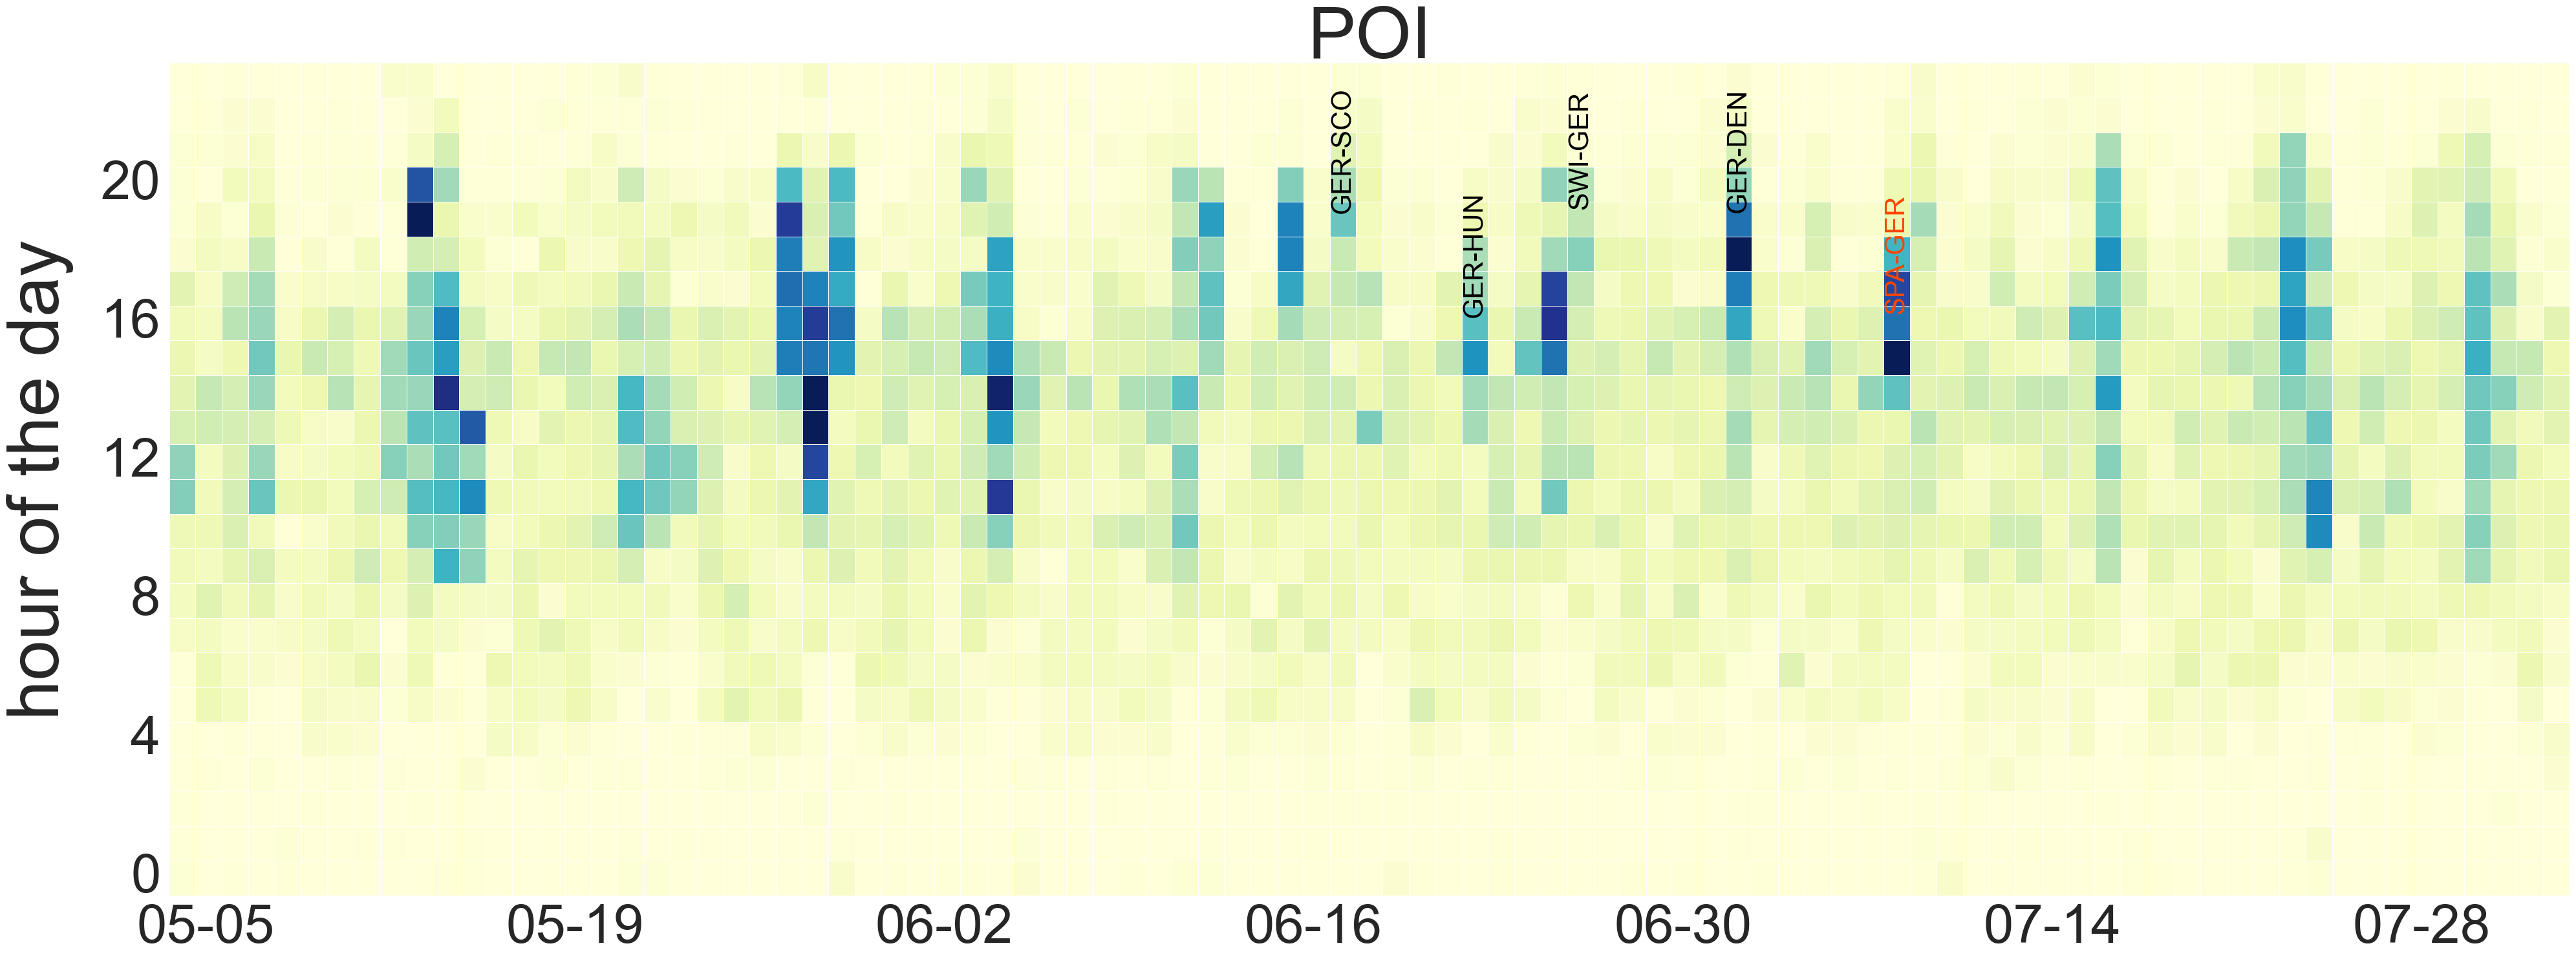

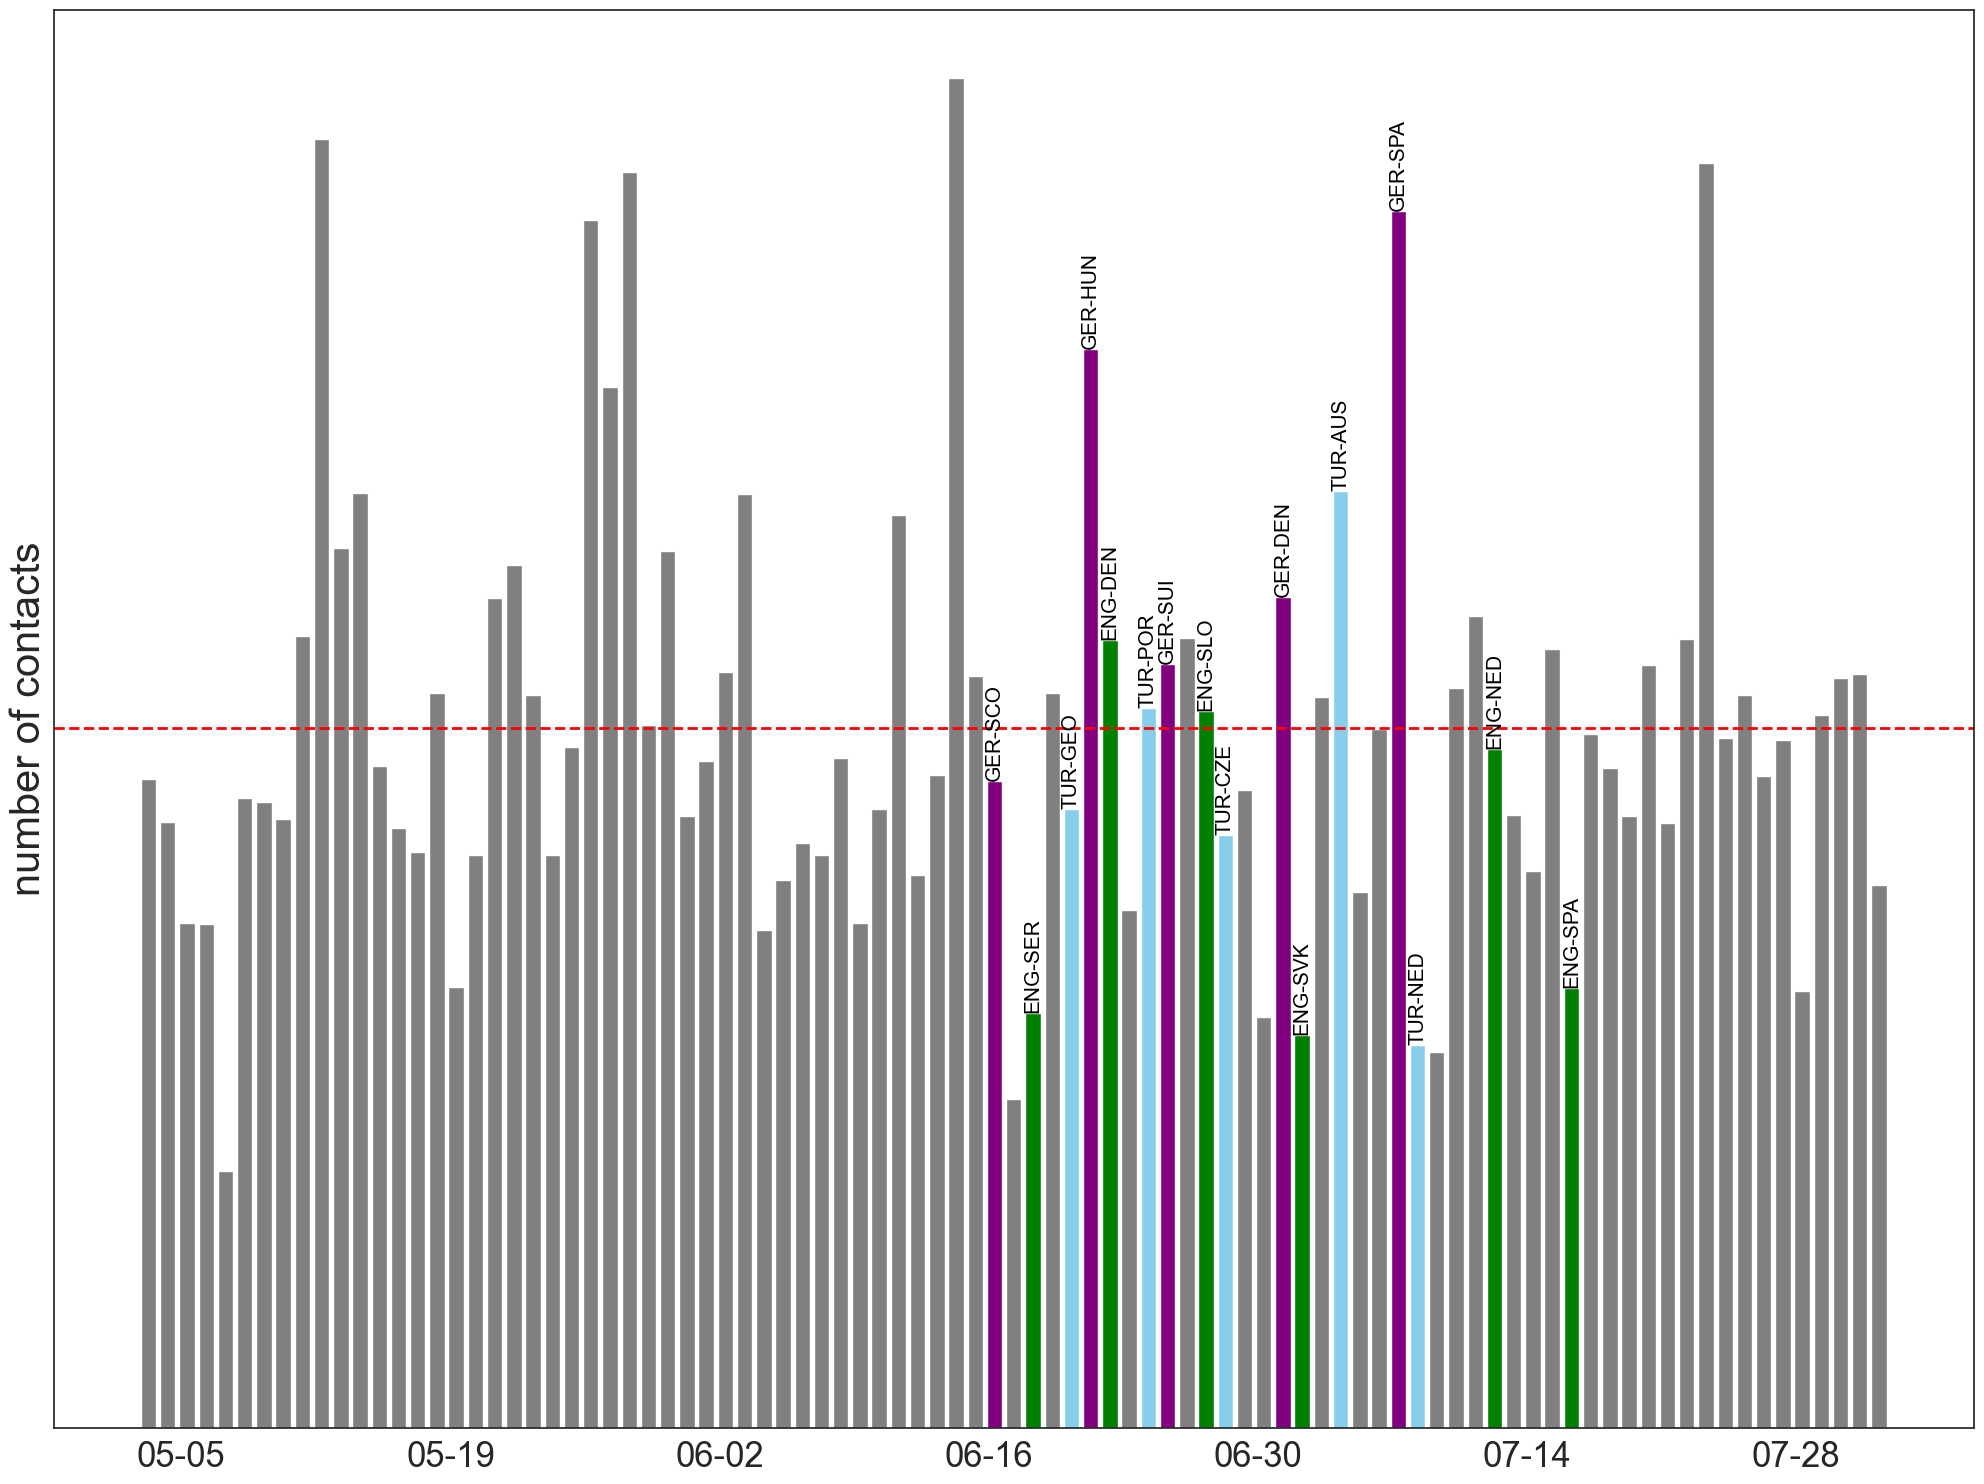

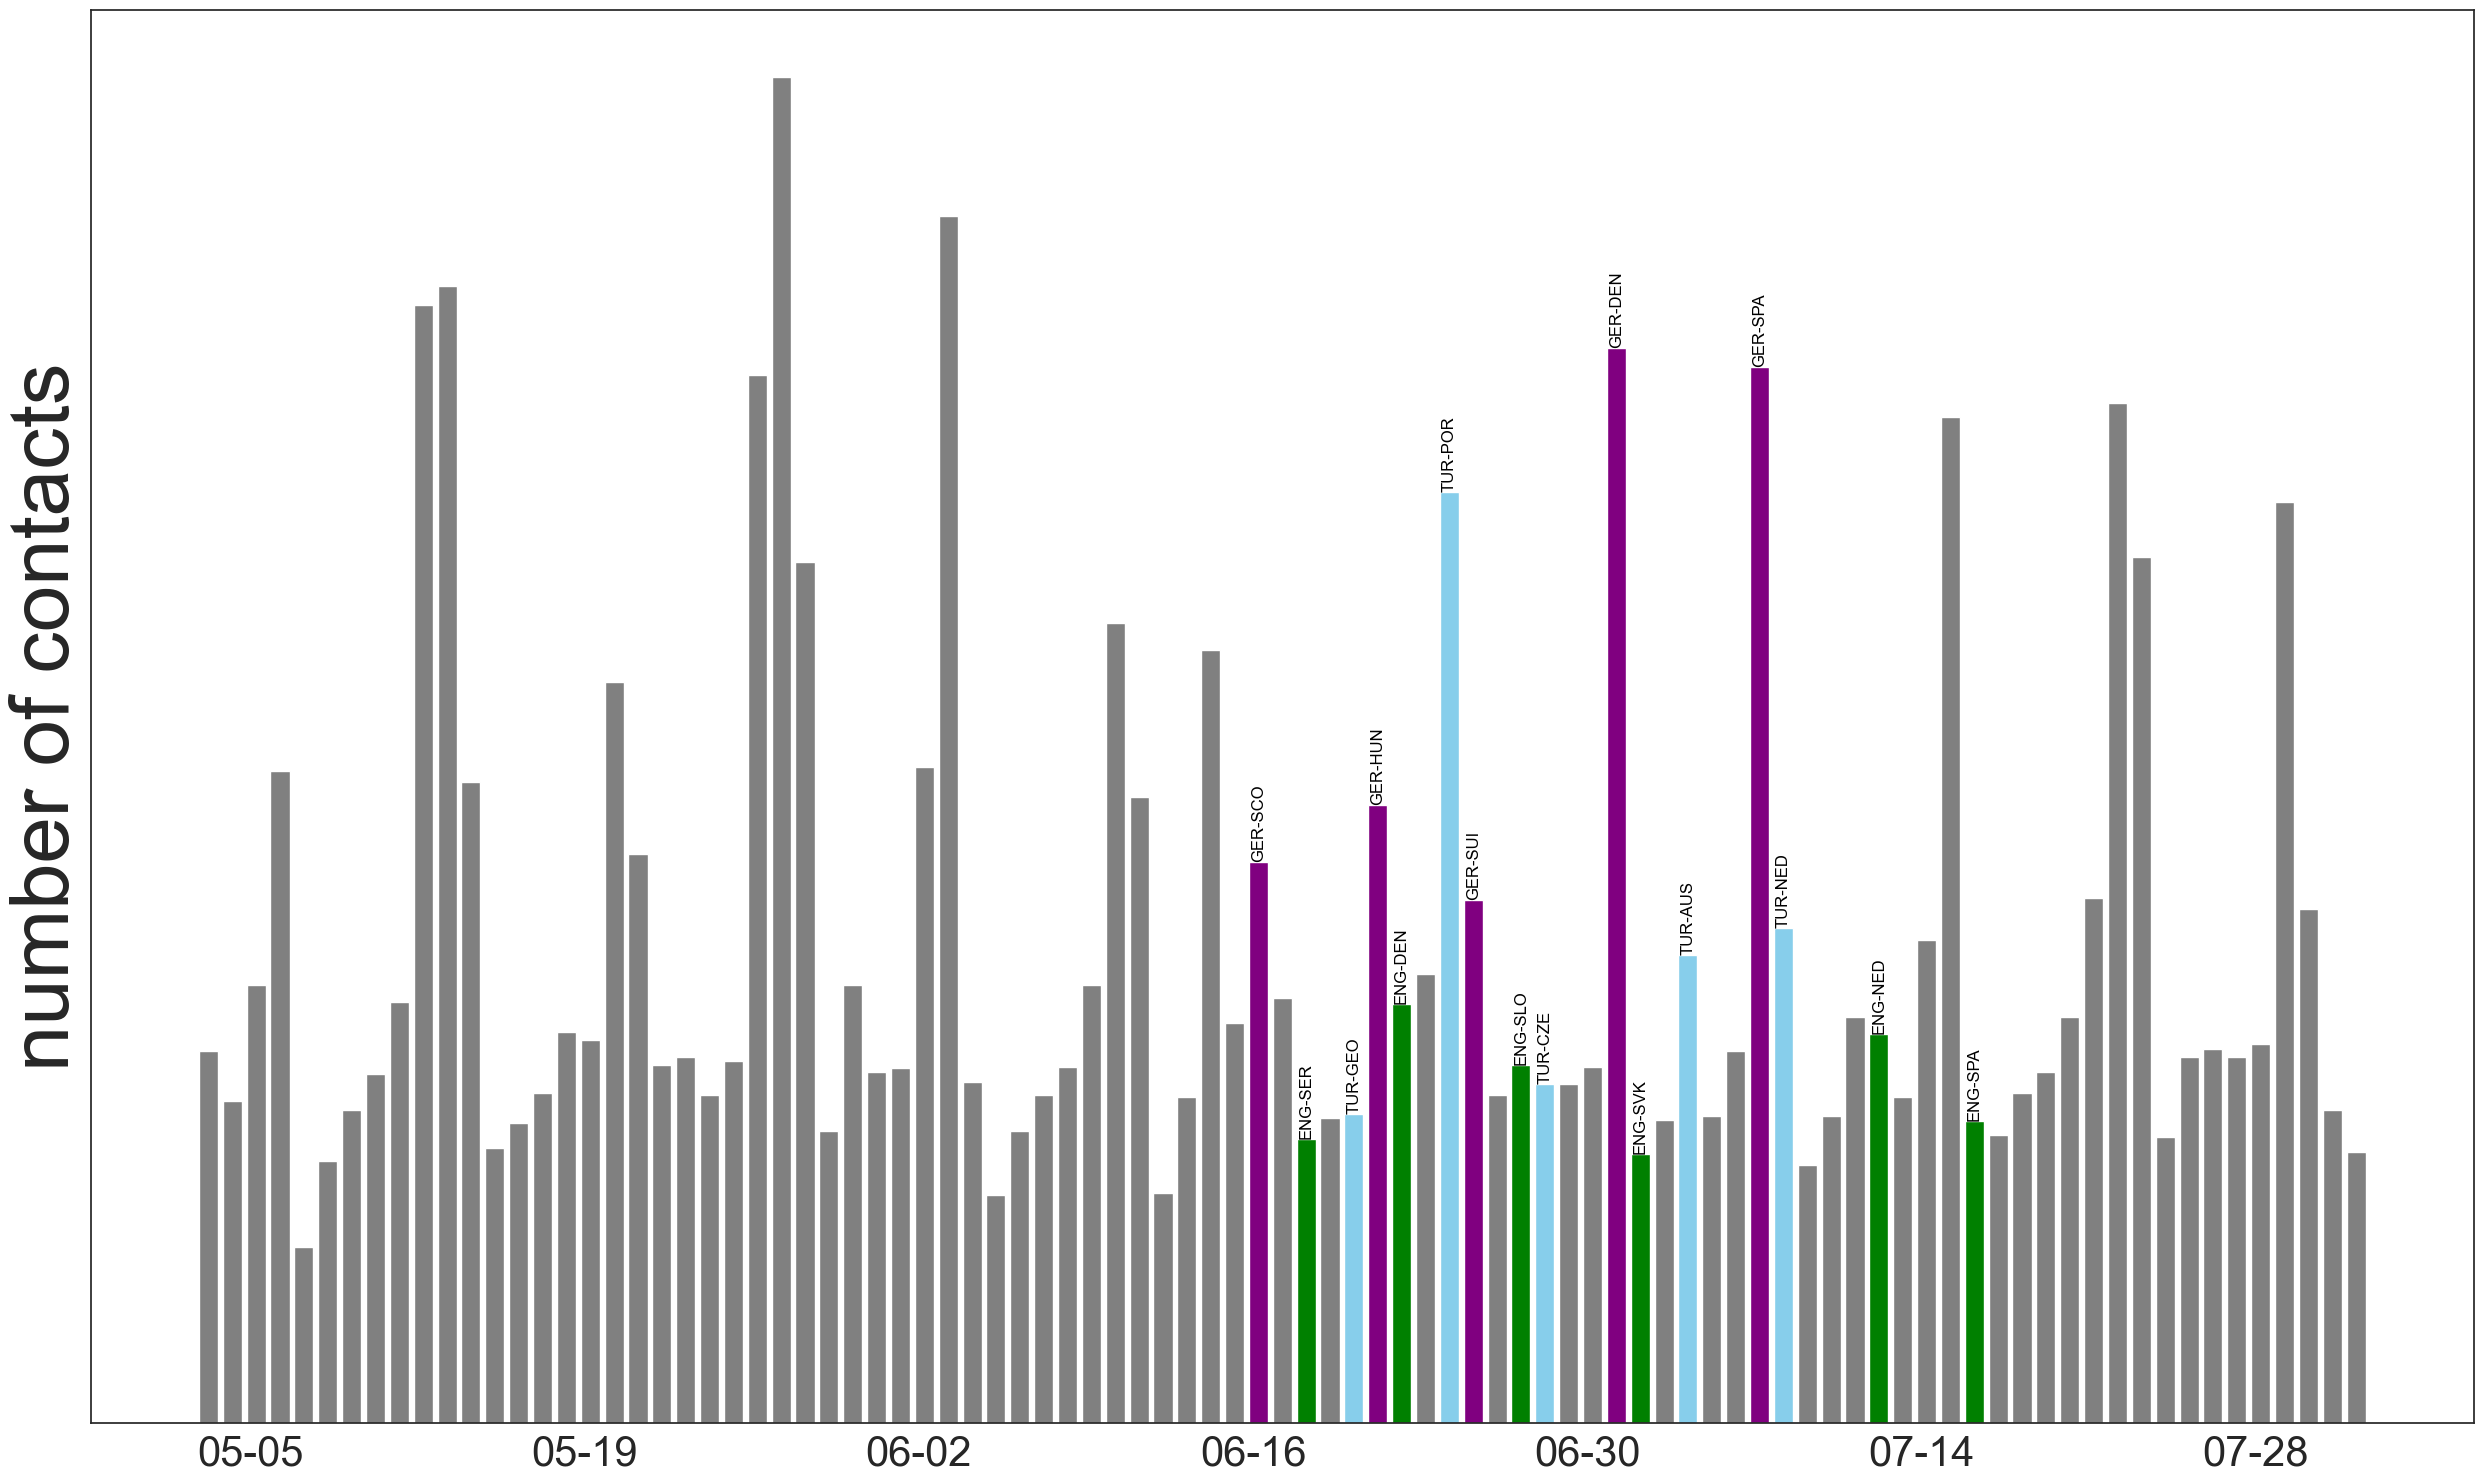

In [117]:
# Flip the heatmap data vertically to display 0 to 23 from bottom to top
heatmap_data = df.to_numpy()
heatmap_data= np.flipud(heatmap_data.T)
 
sns.set_context("notebook")
sns.set_style("white")

# Assuming heatmap_data, start_date, number_of_days, slots, city, and event_times are already defined

vmax_auto = np.max(heatmap_data)
print(vmax_auto)
fig, ax = plt.subplots(figsize=(40, 15))

# Create the heatmap without the color bar
cax = sns.heatmap(heatmap_data, cmap='YlGnBu', vmin=0, vmax=100
                  , ax=ax, linewidths=.5, cbar=False)

# Generate all dates within the range
dates = [start_date + timedelta(days=i) for i in range(number_of_days)]

# Identify all Sundays
sundays = [date for date in dates if date.weekday() == 6]

# Select every other Sunday
sundays_every_two_weeks = sundays[::2]

# Positions of the selected Sundays in the dates list
sunday_positions = [dates.index(sunday) for sunday in sundays_every_two_weeks]

# Set x-ticks at the positions of the selected Sundays
ax.set_xticks(sunday_positions)

# Set x-tick labels as the formatted dates
xtick_labels = [sunday.strftime('%m-%d') for sunday in sundays_every_two_weeks]
ax.set_xticklabels(xtick_labels, ha='right', fontsize=60)

# Set y-ticks every 4 hours
ax.set_yticks([i + 3.5 for i in range(0, slots, 4)])  # Ticks at 0, 4, 8, 12, 16, 20

# Set y-tick labels corresponding to every 4 hours
ax.set_yticklabels(reversed(range(0, slots, 4)), fontsize=60, rotation=0)

# Move the y-axis label slightly to the right
ax.set_ylabel("hour of the day", fontsize=80, labelpad=30)  # Adjust 'labelpad' as needed

ax.set_title('POI', fontsize=80)

# Define a threshold for deciding if the text color should be orange
threshold = 40  # Adjust this value based on your data


# Plot events
# Define the list of target team abbreviations
target_teams = {"GER"}

for (event_city, event_time), event_name in event_times.items():
    
    event_day_index = (event_time.date() - start_date.date()).days
    event_hour_index = slots - 1 - event_time.hour  # Adjusted for 24 slots

    match_parts = event_name.split(" ")
    team1 = match_parts[0][:3].upper()
    score1 = match_parts[1]
    score2 = match_parts[3]
    team2 = match_parts[4][:3].upper()

    team_abbreviation = f"{team1}-{team2}"

    # Check if either team1 or team2 is in the target teams
    if team1 in target_teams or team2 in target_teams:
        # Determine if the value in heatmap_data is below the threshold
        cell_value = heatmap_data[event_hour_index, event_day_index]
        if cell_value < threshold:
            text_color = 'black'
            font_weight = 'normal'
        else:
            text_color = '#FF4500'
            font_weight = 'bold'

        ax.text(event_day_index + 0.5, event_hour_index + 0.5, team_abbreviation,
                ha='center', va='center', color=text_color, fontsize=30, rotation=90)

plt.tight_layout()
plt.show()
 
# Calculate projections on the x and y axes
x_projection = np.sum(heatmap_data, axis=0)
y_projection = np.sum(heatmap_data, axis=1)

# Calculate the average contacts per day type
day_of_week_contacts = {i: [] for i in range(7)}  # Dictionary to hold lists of contacts for each day of the week

for i, date in enumerate(dates):
    day_of_week_contacts[date.weekday()].append(x_projection[i])

# Calculate the average contacts for each day of the week
avg_day_of_week_contacts = {day: np.mean(contacts) for day, contacts in day_of_week_contacts.items()}

# Normalize the x_projection by the average contacts for each day type
normalized_x_projection = np.array([x_projection[i] / avg_day_of_week_contacts[date.weekday()] for i, date in enumerate(dates)])

# Plot the normalized x-axis projection histogram
plt.figure(figsize=(20, 15))
colors = [
    'purple' if date in german_match_dates else
    'skyblue' if date in turkey_match_dates else
    'green' if date in england_match_dates else
    'grey'
    for date in dates
]  # Highlight match dates

bars = plt.bar(range(len(dates)), normalized_x_projection, color=colors)  # Ensure the range matches the number of days

# Generate all dates within the range
dates = [start_date + timedelta(days=i) for i in range(number_of_days)]

# Identify all Sundays
sundays = [date for date in dates if date.weekday() == 6]

# Select every other Sunday
sundays_every_two_weeks = sundays[::2]

# Positions of the selected Sundays in the dates list
sunday_positions = [dates.index(sunday) for sunday in sundays_every_two_weeks]

# Set x-ticks at the positions of the selected Sundays
plt.xticks(sunday_positions)
plt.yticks([])

# Set x-tick labels as the formatted dates
xtick_labels = [sunday.strftime('%m-%d') for sunday in sundays_every_two_weeks]
plt.gca().set_xticklabels(xtick_labels, ha='right', fontsize=25)
plt.axhline(y=1, color='red', linestyle='--', linewidth=2)
# Add labels to the bars for match dates
for i, bar in enumerate(bars):
    date = dates[i]
    match_label = None
    if date in german_match_dates:
        match_label = german_match_dates[date]
    elif date in turkey_match_dates:
        match_label = turkey_match_dates[date]
    elif date in england_match_dates:
        match_label = england_match_dates[date]
    if match_label:
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            match_label,
            ha='center',
            va='bottom',
            color='black',
            fontsize=15,
            rotation='vertical'
        )

plt.ylabel("number of contacts", fontsize=30)
plt.tight_layout()
plt.show()
# Plot the normalized x-axis projection histogram
# Plot the normalized x-axis projection histogram
plt.figure(figsize=(25, 15))
colors = [
    'purple' if date in german_match_dates else
    'skyblue' if date in turkey_match_dates else
    'green' if date in england_match_dates else
    'grey'
    for date in dates
]  # Highlight match dates

bars = plt.bar(range(len(dates)), x_projection, color=colors)

# Identify all Sundays
sundays = [date for date in dates if date.weekday() == 6]

# Select every other Sunday
sundays_every_two_weeks = sundays[::2]

# Positions of the selected Sundays in the dates list
sunday_positions = [dates.index(sunday) for sunday in sundays_every_two_weeks]

# Set x-ticks at the positions of the selected Sundays
plt.xticks(sunday_positions)

# Set x-tick labels as the formatted dates for every two Sundays
xtick_labels = [sunday.strftime('%m-%d') for sunday in sundays_every_two_weeks]
ax = plt.gca()  # Get current axis
ax.set_xticklabels(xtick_labels, ha='right', fontsize=30)

# Add labels to the bars for match dates
for i, bar in enumerate(bars):
    date = dates[i]
    match_label = None
    if date in german_match_dates:
        match_label = german_match_dates[date]
    elif date in turkey_match_dates:
        match_label = turkey_match_dates[date]
    elif date in england_match_dates:
        match_label = england_match_dates[date]
    if match_label:
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            match_label,
            ha='center',
            va='bottom',
            color='black',
            fontsize=12,
            rotation='vertical'
        )

plt.ylabel("number of contacts", fontsize=60)
plt.yticks([])

#plt.title("Sum of Contacts Per Day", fontsize=35)
plt.tight_layout()

plt.show()
 

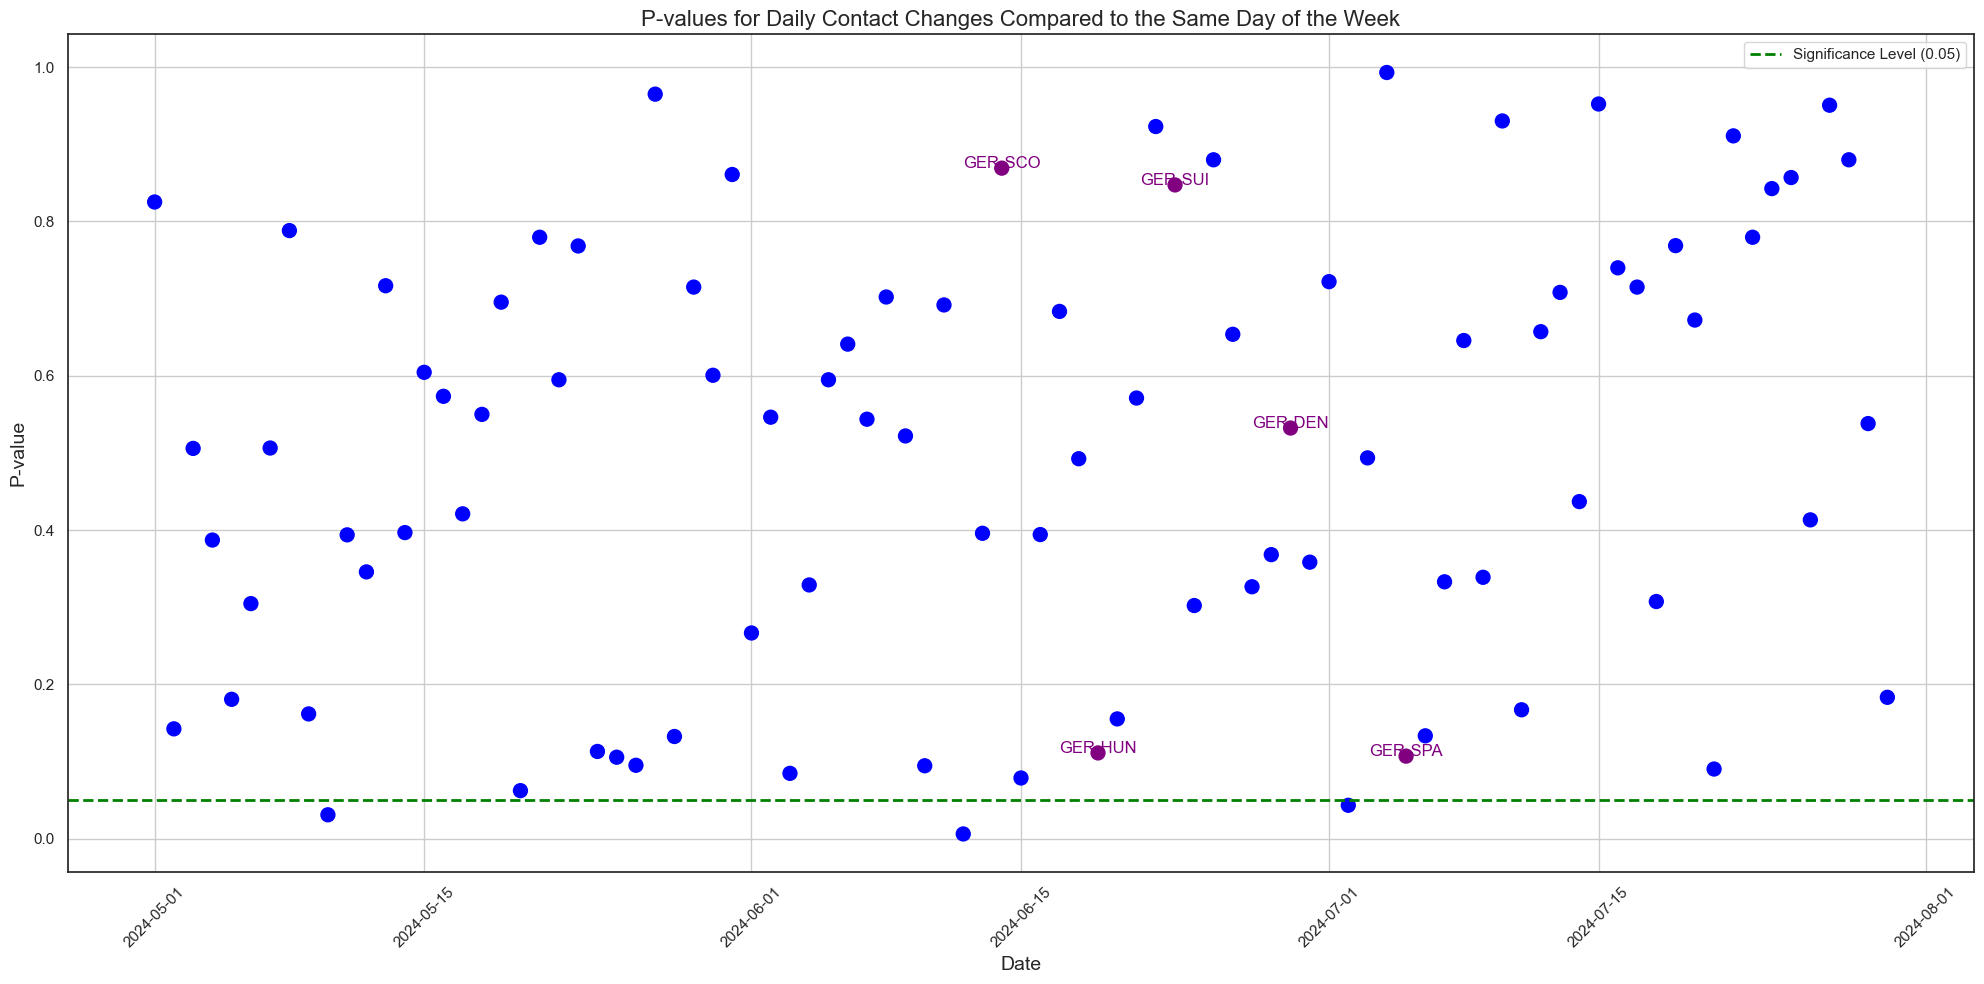

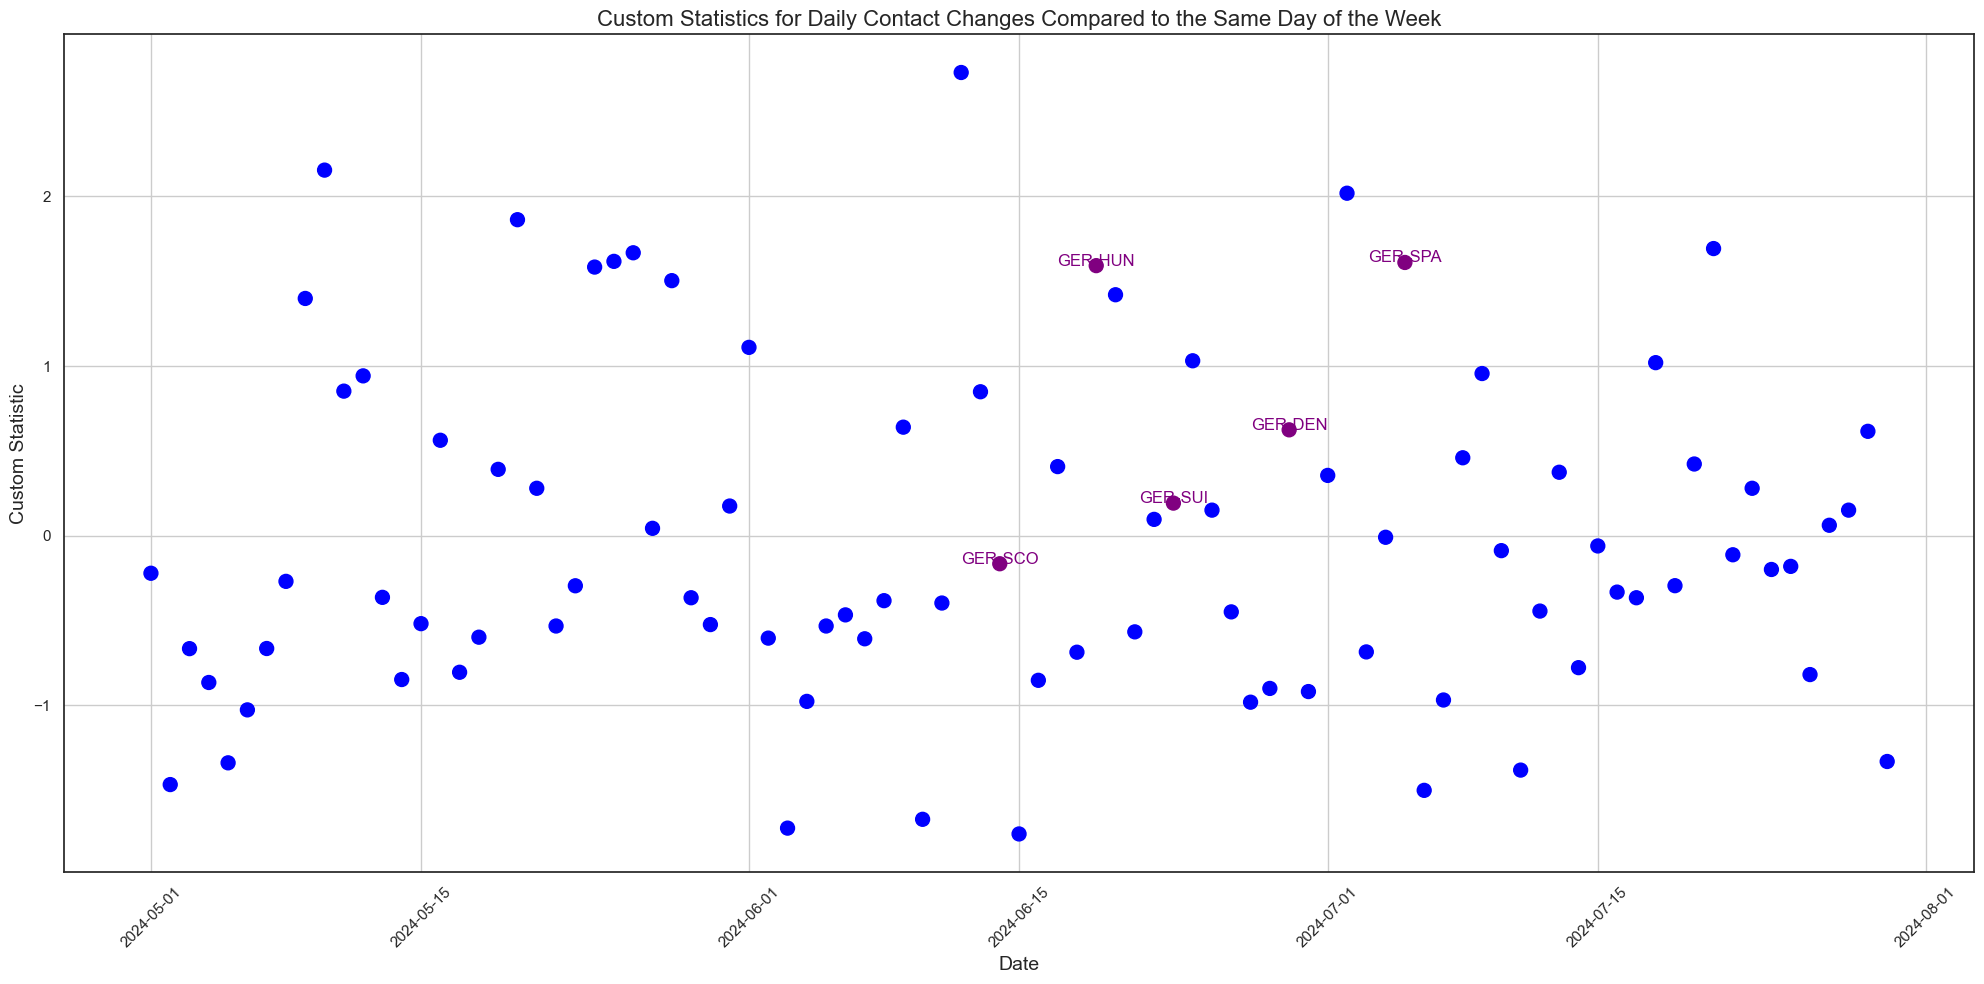

In [118]:

from scipy.stats import norm
from datetime import timedelta

# Example match dates
german_match_dates = {
    pd.to_datetime("2024-06-14"): "GER-SCO",
    pd.to_datetime("2024-06-19"): "GER-HUN",
    pd.to_datetime("2024-06-23"): "GER-SUI",
    pd.to_datetime("2024-06-29"): "GER-DEN",
    pd.to_datetime("2024-07-05"): "GER-SPA"
}

# Assuming dates, heatmap_data, and x_projection are already defined.

# Group contact counts by day of the week
day_of_week_contacts = {i: [] for i in range(7)}

for i, date in enumerate(dates):
    day = date.weekday()
    day_of_week_contacts[day].append(x_projection[i])

# Compute custom statistics for each day in the range, comparing to the distribution for the same weekday
custom_stats = []
p_values = []
for i, date in enumerate(dates):
    day = date.weekday()
    contact_today = x_projection[i]
    all_other_contacts = np.array([contacts for j, contacts in enumerate(day_of_week_contacts[day]) if j != i])

    if len(all_other_contacts) > 1:
        mean_contacts = np.mean(all_other_contacts)
        std_contacts = np.std(all_other_contacts, ddof=1)
        
        if std_contacts > 0:
            custom_stat = (contact_today - mean_contacts) / std_contacts
            p_value = norm.sf(np.abs(custom_stat)) * 2  # Two-tailed test equivalent
        else:
            custom_stat = np.nan
            p_value = np.nan
        
        custom_stats.append(custom_stat)
        p_values.append(p_value)
    else:
        custom_stats.append(np.nan)
        p_values.append(np.nan)

# Plotting days vs. p-values
plt.figure(figsize=(20, 10))

# Color points based on whether the day has a match in Germany
colors = ['purple' if date in german_match_dates else 'blue' for date in dates]

plt.scatter(dates, p_values, color=colors, s=100)  # s=100 for larger dots

# Add a horizontal line at y=0.05 to indicate the significance threshold
plt.axhline(y=0.05, color='green', linestyle='--', linewidth=2, label='Significance Level (0.05)')

# Labeling the plot
plt.xticks(rotation=45)
plt.xlabel('Date', fontsize=14)
plt.ylabel('P-value', fontsize=14)
plt.title('P-values for Daily Contact Changes Compared to the Same Day of the Week', fontsize=16)

# Highlight points for matches in Germany
for i, date in enumerate(dates):
    if date in german_match_dates:
        plt.text(date, p_values[i], german_match_dates[date], fontsize=12, ha='center', color='purple')

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting days vs. custom statistics
plt.figure(figsize=(20, 10))

plt.scatter(dates, custom_stats, color=colors, s=100)  # s=100 for larger dots

# Labeling the plot
plt.xticks(rotation=45)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Custom Statistic', fontsize=14)
plt.title('Custom Statistics for Daily Contact Changes Compared to the Same Day of the Week', fontsize=16)

# Highlight points for matches in Germany
for i, date in enumerate(dates):
    if date in german_match_dates:
        plt.text(date, custom_stats[i], german_match_dates[date], fontsize=12, ha='center', color='purple')

plt.grid(True)
plt.tight_layout()
plt.show()